In [812]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

- Goal: 
    - Understanding your audience better. Learning about their needs, their struggles, their motivations, their habits and their relationships to your product or service.

- Analysis:

    - start my discovery process with a funnel analysis, a segmentation or a retention analysis project

    - (A) Business Analytics (aka Descriptive Analytics).
        - It answers the questions of “what has happened in the past?” and “where are we now?”
        - (E.g. reporting, measuring retention (how many users come back, maybe cohort analysis?), finding the right user segments, funnel analysis, etc.)
        - You can segment the users and understand how those who booked differ from those who didn’t.
        - You can also try to find correlations that drive bookings

    - (B) Predictive Analytics
        - It answers the question, “what will happen in the future?”
        - (E.g. early warning (predicting which user will cancel her subscription next month), predicting the marketing budget you will need in the next quarter, etc.)

    - Which one of these brings the most business value?
        - ROI – Return on Investment.

    - Which source of guest is more likely to convert to a booking?

    - If you can find user-segments who are more successful (have better conversion numbers) at certain steps than others, then you instantly have great insights into who to target in the future, as well as into why other users may have gotten stuck at certain steps.

In [813]:
df = pd.read_csv('./../data-workfile/search-and-bookings.csv', index_col='Unnamed: 0')

In [814]:
df.head()

search_log_session_id                   uuid  session_id utm_source  \
0                   4034  1145549807.1726611234  1726611549         na   
1                   4037  2039466988.1726611511  1726611615   facebook   
2                   4069  1556994523.1726611965  1726612033     google   
3                   4034  1145549807.1726611234  1726611549         na   
4                   4102   901475575.1726612653  1726612722     google   

  utm_medium utm_campaign hotel_id  search_log_id         utc_datetime  \
0  (not set)           na  hotel_1         112645  2024-09-17 22:19:09   
1        cpc   other_camp  hotel_1         112648  2024-09-17 22:20:15   
2        cpc          NaN  hotel_1         112680  2024-09-17 22:27:13   
3  (not set)           na  hotel_1         112682  2024-09-17 22:28:30   
4        cpc          NaN  hotel_1         112714  2024-09-17 22:38:42   

  lang_code  ... ROOMHH_room_price_min ROOMHH_room_price_max pieces  \
0        hu  ...                   NaN                   NaN    NaN   
1        hu  ...                   NaN                   NaN    NaN   
2        de  ...                   NaN                   NaN    NaN   
3        hu  ...                   NaN                   NaN    NaN   
4        en  ...                684.25                771.19    NaN   

   sum_price  total_price_final_y  rooms_total_price  upsell_total_price  \
0        NaN                  NaN                NaN                 NaN   
1        NaN                  NaN                NaN                 NaN   
2        NaN                  NaN                NaN                 NaN   
3        NaN                  NaN                NaN                 NaN   
4        NaN                  NaN                NaN                 NaN   

   vouchers_total_price  loyalty_discount_total  redeemed_loyalty_points_total  
0                   NaN                     NaN                            NaN  
1                   NaN                     NaN                            NaN  
2                   NaN                     NaN                            NaN  
3                   NaN                     NaN                            NaN  
4                   NaN                     NaN                            NaN  

[5 rows x 52 columns]

In [815]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57858 entries, 0 to 57857
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   search_log_session_id          57858 non-null  int64  
 1   uuid                           57858 non-null  object 
 2   session_id                     57858 non-null  int64  
 3   utm_source                     57858 non-null  object 
 4   utm_medium                     57858 non-null  object 
 5   utm_campaign                   55062 non-null  object 
 6   hotel_id                       57858 non-null  object 
 7   search_log_id                  57858 non-null  int64  
 8   utc_datetime                   57858 non-null  object 
 9   lang_code                      57858 non-null  object 
 10  currency                       57858 non-null  object 
 11  arrival                        57858 non-null  object 
 12  departure                      57858 non-null  obje

In [816]:
df.columns

Index(['search_log_session_id', 'uuid', 'session_id', 'utm_source',
       'utm_medium', 'utm_campaign', 'hotel_id', 'search_log_id',
       'utc_datetime', 'lang_code', 'currency', 'arrival', 'departure', 'days',
       'nights', 'adults', 'children', 'conversion', 'search_log_room_id',
       'sel_num_of_rooms', 'picked_price_median', 'picked_room', '0_age',
       '1_age', '2_age', '3_age', '4_age', 'baby_bed', 'ROOMAA_room_price_min',
       'ROOMAA_room_price_max', 'ROOMBB_room_price_min',
       'ROOMBB_room_price_max', 'ROOMCC_room_price_min',
       'ROOMCC_room_price_max', 'ROOMDD_room_price_min',
       'ROOMDD_room_price_max', 'ROOMEE_room_price_min',
       'ROOMEE_room_price_max', 'ROOMFF_room_price_min',
       'ROOMFF_room_price_max', 'ROOMGG_room_price_min',
       'ROOMGG_room_price_max', 'ROOMHH_room_price_min',
       'ROOMHH_room_price_max', 'pieces', 'sum_price', 'total_price_final_y',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
      

<Axes: xlabel='days', ylabel='nights'>

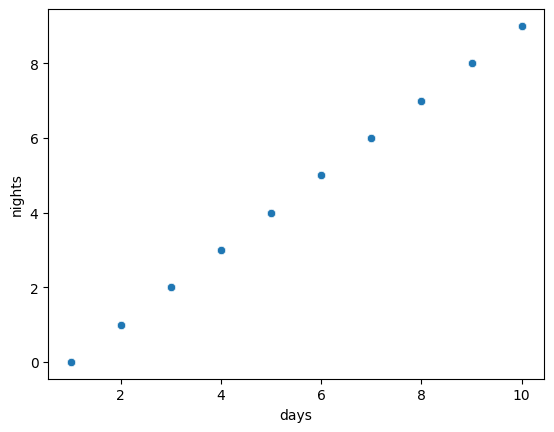

In [817]:
# is the 'nights' column necessary?
sns.scatterplot(data=df, x='days', y='nights')

In [818]:
df.rename(columns={'total_price_final_y':'total_price_final'}, inplace=True)

## Basic funnel analysis for an overview

In [819]:
# hotel 1
hotel1 = df[df['hotel_id']=='hotel_1'].drop(columns='hotel_id').copy()
hotel1['utc_datetime'] = pd.to_datetime(hotel1['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
hotel1 = hotel1[hotel1['utc_datetime'] > '2024-09-17'].copy()
# keep the uniqe users
hotel1.drop_duplicates(subset='uuid', keep='last', inplace=True)  # there are some guests, who booked rooms several times (61 pieces in total). I keep the last booking

# hotel 2
hotel2 = df[df['hotel_id']=='hotel_2'].drop(columns='hotel_id').copy()
hotel2['utc_datetime'] = pd.to_datetime(hotel2['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
hotel2 = hotel2[hotel2['utc_datetime'] > '2024-09-17'].copy()
# keep the uniqe users
hotel2.drop_duplicates(subset='uuid', keep='last', inplace=True)  # there are some guests, who booked rooms several times (61 pieces in total). I keep the last booking

# hotel 3
hotel3 = df[df['hotel_id']=='hotel_3'].drop(columns='hotel_id').copy()
hotel3['utc_datetime'] = pd.to_datetime(hotel3['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
hotel3 = hotel3[hotel3['utc_datetime'] > '2024-09-17'].copy()
# keep the uniqe users
hotel3.drop_duplicates(subset='uuid', keep='last', inplace=True)  # there are some guests, who booked rooms several times (61 pieces in total). I keep the last booking

In [820]:
funnel1 = list()
funnel1.append(len(hotel1))
funnel1.append(len(hotel1[(hotel1[['ROOMAA_room_price_min','ROOMBB_room_price_min','ROOMCC_room_price_min','ROOMDD_room_price_min','ROOMEE_room_price_min','ROOMFF_room_price_min','ROOMGG_room_price_min','ROOMHH_room_price_min']].notna().sum(axis=1))>0])) # where there was at least 1 offered room
funnel1.append((hotel1['conversion']==1).sum())

In [821]:
funnel2 = list()
funnel2.append(len(hotel2))
funnel2.append(len(hotel2[(hotel2[['ROOMAA_room_price_min','ROOMBB_room_price_min','ROOMCC_room_price_min','ROOMDD_room_price_min','ROOMEE_room_price_min','ROOMFF_room_price_min','ROOMGG_room_price_min','ROOMHH_room_price_min']].notna().sum(axis=1))>0]))
funnel2.append((hotel2['conversion']==1).sum())

In [822]:
funnel3 = list()
funnel3.append(len(hotel3))
funnel3.append(len(hotel3[(hotel3[['ROOMAA_room_price_min','ROOMBB_room_price_min','ROOMCC_room_price_min','ROOMDD_room_price_min','ROOMEE_room_price_min','ROOMFF_room_price_min','ROOMGG_room_price_min','ROOMHH_room_price_min']].notna().sum(axis=1))>0]))
funnel3.append((hotel3['conversion']==1).sum())

In [823]:
(np.array(funnel1)/len(hotel1))

array([1.        , 0.93153406, 0.07033532])

[Text(0, 0, 'Mean:\n100.00'),
 Text(0, 0, 'Mean:\n93.70'),
 Text(0, 0, 'Mean:\n4.88')]

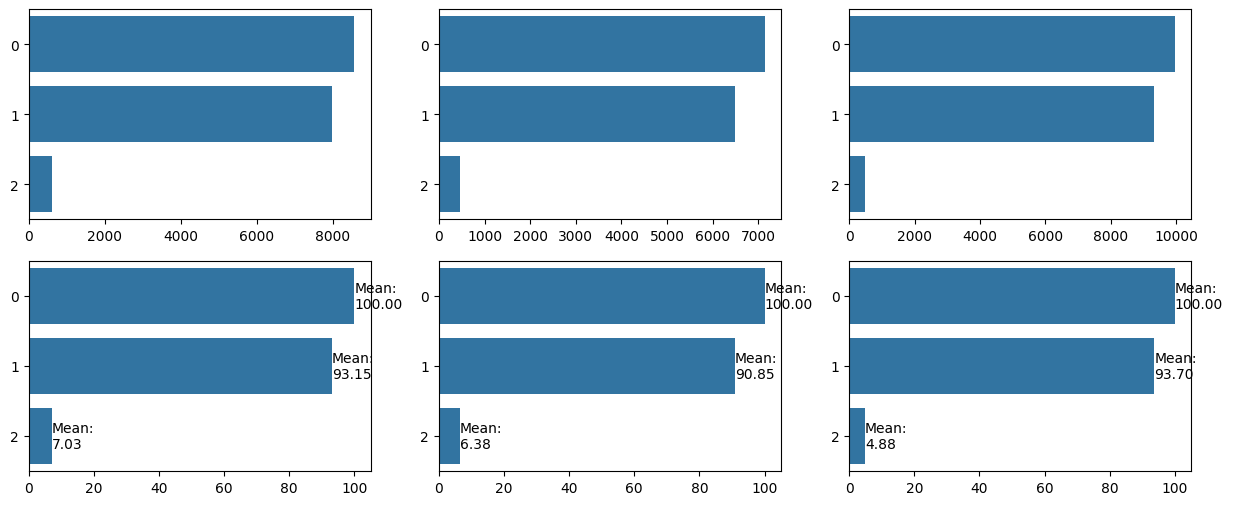

In [824]:
fig, ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(15,6))
sns.barplot(ax=ax11, y=np.arange(len(funnel1)), x=funnel1 , orient='h')
sns.barplot(ax=ax12, y=np.arange(len(funnel2)), x=funnel2, orient='h')
sns.barplot(ax=ax13, y=np.arange(len(funnel3)), x=funnel3, orient='h')

sns.barplot(ax=ax21, y=np.arange(len(funnel1)), x=(np.array(funnel1)/len(hotel1))*100 , orient='h').bar_label(ax21.containers[-1], fmt='Mean:\n%.2f', label_type='edge')
sns.barplot(ax=ax22, y=np.arange(len(funnel2)), x=(np.array(funnel2)/len(hotel2))*100, orient='h').bar_label(ax22.containers[-1], fmt='Mean:\n%.2f', label_type='edge')
sns.barplot(ax=ax23, y=np.arange(len(funnel3)), x=(np.array(funnel3)/len(hotel3))*100, orient='h').bar_label(ax23.containers[-1], fmt='Mean:\n%.2f', label_type='edge')

# 1: datepicker unique visitors
# 2: room offered
# 3: booked

### Time-delay between the first datepicker visit and then the booking

In [825]:
# calculate the time difference between the first visit and the booking

return_time = []
for hotel_num in ['hotel_1', 'hotel_2', 'hotel_3']:
    for index, row in df[df['uuid'].duplicated(keep='first') & (df['conversion'] == 1) & (df['hotel_id']==hotel_num)]['uuid'].items():
    
        i_first = df[df['uuid'].duplicated(keep=False) & (df['hotel_id']==hotel_num) & (df['uuid']==row)]['uuid'].index[0]
        i_last = df[df['uuid'].duplicated(keep=False) & (df['hotel_id']==hotel_num) & (df['uuid']==row)]['uuid'].index[-1]

        return_time.append({
            'uuid': row,
            'first_visit': df.loc[i_first, 'utc_datetime'],
            'last_visit': df.loc[i_last, 'utc_datetime'],
            'hotel_id': hotel_num
        })
    
return_time = pd.DataFrame(return_time)

In [826]:
return_time['time_diff'] = (pd.to_datetime(return_time['last_visit'], format='%Y-%m-%d %H:%M:%S') - pd.to_datetime(return_time['first_visit'], format='%Y-%m-%d %H:%M:%S')).dt.total_seconds() / 3600 # in hours

<Axes: ylabel='Frequency'>

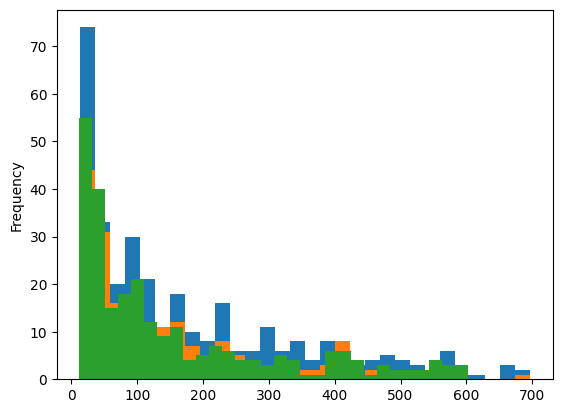

In [827]:
return_time[(return_time['hotel_id']=='hotel_1') & (return_time['time_diff']>12)]['time_diff'].plot(kind='hist', bins=30)
return_time[(return_time['hotel_id']=='hotel_2') & (return_time['time_diff']>12)]['time_diff'].plot(kind='hist', bins=30)
return_time[(return_time['hotel_id']=='hotel_3') & (return_time['time_diff']>12)]['time_diff'].plot(kind='hist', bins=30)

<Axes: xlabel='total_price_final', ylabel='picked_price_median'>

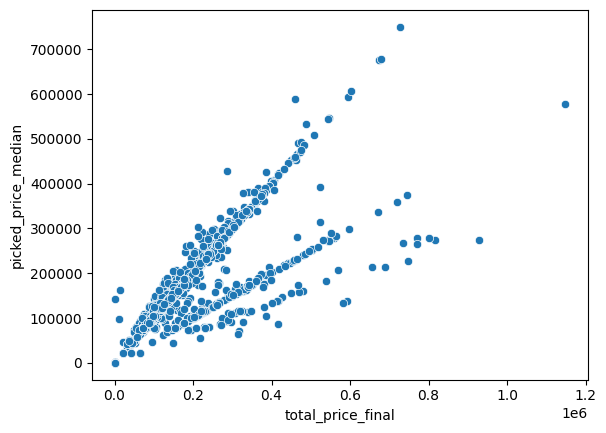

In [828]:
sns.scatterplot(data=df, x='total_price_final' ,y='picked_price_median')

<Axes: xlabel='total_price_final', ylabel='rooms_total_price'>

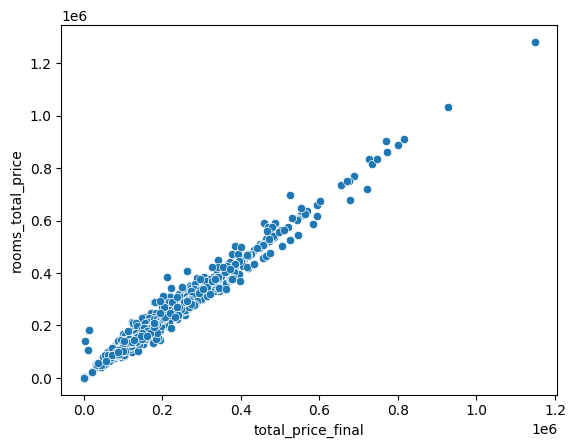

In [829]:
sns.scatterplot(data=df, x='total_price_final' ,y='rooms_total_price')


In [830]:
# currency conversion

# ccrape down the EUR exchange rate data from MNB's webpage

import requests
from bs4 import BeautifulSoup

# Define the URL
url = 'https://www.mnb.hu/arfolyam-tablazat?deviza=rbCurrencyActual&devizaSelected=EUR&datefrom=2024.09.17.&datetill=2024.10.18.&order=1'

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table') 

# rows into a table
table_data = []
for row in table.find_all('tr'):
    cells = row.find_all(['td', 'th'])
    table_data.append([cell.get_text(strip=True) for cell in cells])

eur_price = pd.DataFrame(table_data[1:], columns=table_data[0])  # first row to header

eur_price = eur_price.drop(index=[0,1]).reset_index()

eur_price = eur_price.rename(columns={'':'date'})[['date','EUR']]

In [831]:
# dates to YYYY-MM-DD format

hungarian_to_english = {
    'január': 'January', 'február': 'February', 'március': 'March', 'április': 'April',
    'május': 'May', 'június': 'June', 'július': 'July', 'augusztus': 'August',
    'szeptember': 'September', 'október': 'October', 'november': 'November', 'december': 'December',
    'hétfő': 'Monday', 'kedd': 'Tuesday', 'szerda': 'Wednesday', 'csütörtök': 'Thursday',
    'péntek': 'Friday', 'szombat': 'Saturday', 'vasárnap': 'Sunday'
}

def convert_hungarian_date(date_str):
    for hun, eng in hungarian_to_english.items():
        date_str = date_str.replace(hun, eng)
    date_obj = datetime.strptime(date_str, '%Y. %B %d., %A')
    return date_obj.strftime('%Y-%m-%d')

# apply the function to the df column
eur_price['date'] = eur_price['date'].apply(convert_hungarian_date)

In [832]:
eur_price['date'] = pd.to_datetime(eur_price['date'])

In [833]:
# Convert date column to datetime and value column to numeric
eur_price.set_index('date', inplace=True)

# Create a complete date range from the first to the last date
date_range = pd.date_range(start=eur_price.index.min(), end=eur_price.index.max(), freq='D')

# Reindex the DataFrame to include all dates in the range
eur_price = eur_price.reindex(date_range)

In [834]:
eur_price['EUR'] = eur_price['EUR'].fillna(method='ffill')

In [835]:
def conversion(x):
    rate = eur_price[eur_price.index == x]['EUR'].values
    if rate:
        return float(rate[0].replace(',', '.')) 
    else:
        return None

In [836]:
df['simple_date'] = pd.to_datetime(df['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')

In [837]:
# Set the default conversion rate to 1
df['conversion_rate'] = 1

# Update 'conversion_rate' only where 'currency' is 'EUR'
df.loc[df['currency'] == 'EUR', 'conversion_rate'] = df.loc[df['currency'] == 'EUR', 'simple_date'].apply(conversion)

In [ ]:
# rooms price 
df['picked_price_median'] =  df['rooms_total_price']/df['sel_num_of_rooms']

In [839]:
df['total_price_final'] = df['conversion_rate']*df['total_price_final']
df['rooms_total_price'] = df['conversion_rate']*df['rooms_total_price']
df['upsell_total_price'] = df['conversion_rate']*df['upsell_total_price']
df['vouchers_total_price'] = df['conversion_rate']*df['vouchers_total_price']
df['loyalty_discount_total'] = df['conversion_rate']*df['loyalty_discount_total']
df['picked_price_median'] = df['conversion_rate']*df['picked_price_median']

In [840]:
df['offered_price_median'] = (df[['ROOMAA_room_price_min', 'ROOMAA_room_price_max','ROOMBB_room_price_min', 'ROOMBB_room_price_max','ROOMCC_room_price_min', 'ROOMCC_room_price_max','ROOMDD_room_price_min', 'ROOMDD_room_price_max','ROOMEE_room_price_min', 'ROOMEE_room_price_max',
       'ROOMFF_room_price_min', 'ROOMFF_room_price_max','ROOMGG_room_price_min', 'ROOMGG_room_price_max','ROOMHH_room_price_min', 'ROOMHH_room_price_max']].median(axis=1)/df['nights'])/df['sel_num_of_rooms']
df['offered_price_min'] = (df[['ROOMAA_room_price_min','ROOMBB_room_price_min','ROOMCC_room_price_min','ROOMDD_room_price_min','ROOMEE_room_price_min',
       'ROOMFF_room_price_min','ROOMGG_room_price_min','ROOMHH_room_price_min']].min(axis=1)/df['nights'])/df['sel_num_of_rooms']
df['offered_price_max'] = (df[['ROOMAA_room_price_max', 'ROOMBB_room_price_max', 'ROOMCC_room_price_max', 'ROOMDD_room_price_max', 'ROOMEE_room_price_max',
       'ROOMFF_room_price_max', 'ROOMGG_room_price_max', 'ROOMHH_room_price_max']].max(axis=1)/df['nights'])/df['sel_num_of_rooms']

df['offered_price_median'] = df['offered_price_median'] * df['conversion_rate']
df['offered_price_min'] = df['offered_price_min'] * df['conversion_rate']
df['offered_price_max'] = df['offered_price_max'] * df['conversion_rate']

In [841]:
df.drop(columns=['conversion_rate', 'simple_date'], inplace=True)

In [842]:
# new column, if_children = 1, if children included
df['if_children'] = 0
df['if_children'].loc[df['children'] > 0] = 1

In [ ]:
# new_column = picked_room_price/night

df['picked_price_p_night'] = df['picked_price_median']/df['nights']

In [844]:
df['arrival'] = pd.to_datetime(df['arrival'])
df['departure'] = pd.to_datetime(df['departure'])
df['utc_datetime'] = pd.to_datetime(df['utc_datetime'])

In [845]:
# extract date information
    # - day of the week
    # - weekend and public holiday or not
    # - time of the day

import holidays
hungarian_holidays = holidays.Hungary()

df['day_of_week'] = df['utc_datetime'].dt.dayofweek + 1
df['is_holiday'] = ((df['day_of_week'].isin([6, 7])) | (df['utc_datetime'].dt.date.apply(lambda x: x in hungarian_holidays)))

# time of day
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['utc_datetime'].dt.hour.apply(get_time_of_day)

In [846]:
# extract information from the arrival and departure information

# time netween arrival and booking
df['lead_time'] = (df['arrival'] - df['utc_datetime']).dt.days

- introduce new variables

In [847]:

# group lead time into categories
def lead_time_category(days):
    if days <= 7:
        return 'last_minute'
    elif days <= 30:
        return 'short_term'
    elif days <= 90:
        return 'medium_term'
    else:
        return 'long_term'
df['lead_time_category'] = df['lead_time'].apply(lead_time_category)


# day of the week for arrival and departure
df['arrival_day_of_week'] = df['arrival'].dt.dayofweek + 1
df['departure_day_of_week'] = df['departure'].dt.dayofweek + 1

# holiday or weekend flag for arrival and departure
df['arrival_is_holiday'] = (df['arrival_day_of_week'].isin([6, 7]) | (df['arrival'].dt.date.apply(lambda x: x in hungarian_holidays)))
df['departure_is_holiday'] = (df['departure_day_of_week'].isin([6, 7]) | (df['departure'].dt.date.apply(lambda x: x in hungarian_holidays)))


# create new variable for the entire stay period

#generate a list of dates for each stay period
df['stay_dates'] = df.apply(lambda x: pd.date_range(x['arrival'], x['departure'], freq='D'), axis=1)
# check if stay includes a weekend or a public holiday
df['stay_includes_weekend'] = df['stay_dates'].apply(lambda dates: any(((date.weekday() in [5, 6]) | (date in hungarian_holidays)) for date in dates))
# extract all unique days of the week included in the stay period
df['days_of_week_in_stay'] = df['stay_dates'].apply(lambda dates: {date.weekday() + 1 for date in dates})
# count the number of specific weekdays
df['num_saturdays'] = df['stay_dates'].apply(lambda dates: sum(date.weekday() == 5 for date in dates))
df['num_sundays'] = df['stay_dates'].apply(lambda dates: sum(date.weekday() == 6 for date in dates))

In [848]:
df.drop(columns='days', inplace=True)

In [849]:
print(str(df['nights'].mean()) + ', '+ str(df['nights'].std()))

2.4905803864634106, 1.0498191099852285


### RFM

In [850]:
# RFM segmentation, based on: picked_price_median, days
# define segment boundaries based low duration = mean-1*std, medium duration = mean+-1*std, long duration = mean+1*std

df['rfm_monetary_score'] = pd.qcut(df['picked_price_p_night'], 4, labels=False)
df['rfm_duration_score'] = pd.cut(df['nights'], bins=[min(df['nights'])] + list([2, 4]) + [max(df['nights'])], labels=['1','2-3','4-9'] ,right=True)

In [851]:
df['picked_price_p_night'].quantile([0.25, 0.5, 0.75])

0.25    52247.340000
0.50    67008.097024
0.75    86893.342500
Name: picked_price_p_night, dtype: float64

In [852]:
# add mean children age column
df['children_age_mean'] = df[['0_age', '1_age', '2_age', '3_age', '4_age']].mean(axis=1)

In [853]:
df.columns

Index(['search_log_session_id', 'uuid', 'session_id', 'utm_source',
       'utm_medium', 'utm_campaign', 'hotel_id', 'search_log_id',
       'utc_datetime', 'lang_code', 'currency', 'arrival', 'departure',
       'nights', 'adults', 'children', 'conversion', 'search_log_room_id',
       'sel_num_of_rooms', 'picked_price_median', 'picked_room', '0_age',
       '1_age', '2_age', '3_age', '4_age', 'baby_bed', 'ROOMAA_room_price_min',
       'ROOMAA_room_price_max', 'ROOMBB_room_price_min',
       'ROOMBB_room_price_max', 'ROOMCC_room_price_min',
       'ROOMCC_room_price_max', 'ROOMDD_room_price_min',
       'ROOMDD_room_price_max', 'ROOMEE_room_price_min',
       'ROOMEE_room_price_max', 'ROOMFF_room_price_min',
       'ROOMFF_room_price_max', 'ROOMGG_room_price_min',
       'ROOMGG_room_price_max', 'ROOMHH_room_price_min',
       'ROOMHH_room_price_max', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_

In [854]:
# rearrange columns

df = df[['search_log_session_id', 'search_log_id', 'session_id', 'search_log_room_id','uuid', 'utc_datetime', 'utm_source',
   'utm_medium', 'utm_campaign','lang_code', 'currency', 'arrival', 'departure', 'nights',
    'adults', 'children', 'if_children',  'children_age_mean', 'conversion',
    'sel_num_of_rooms', 'picked_price_median', 'picked_price_p_night','picked_room', 'baby_bed', 'pieces', 'sum_price', 'total_price_final',
    'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
    'loyalty_discount_total', 'redeemed_loyalty_points_total', 'hotel_id', 'rfm_monetary_score', 'rfm_duration_score', '0_age',
    '1_age', '2_age', '3_age', '4_age', 'ROOMAA_room_price_min','offered_price_median','offered_price_min','offered_price_max',
    'ROOMAA_room_price_max', 'ROOMBB_room_price_min','ROOMBB_room_price_max', 'ROOMCC_room_price_min',
    'ROOMCC_room_price_max', 'ROOMDD_room_price_min','ROOMDD_room_price_max', 'ROOMEE_room_price_min',
    'ROOMEE_room_price_max', 'ROOMFF_room_price_min','ROOMFF_room_price_max', 'ROOMGG_room_price_min',
    'ROOMGG_room_price_max', 'ROOMHH_room_price_min','ROOMHH_room_price_max', 'day_of_week',
    'is_holiday', 'time_of_day', 'stay_dates', 'lead_time',
    'lead_time_category', 'arrival_day_of_week', 'departure_day_of_week',
    'arrival_is_holiday', 'departure_is_holiday', 'stay_includes_weekend',
    'days_of_week_in_stay', 'num_saturdays', 'num_sundays']]

In [855]:
hotel1 = df[df['hotel_id']=='hotel_1'].drop(columns='hotel_id').copy()
hotel2 = df[df['hotel_id']=='hotel_2'].drop(columns='hotel_id').copy()
hotel3 = df[df['hotel_id']=='hotel_3'].drop(columns='hotel_id').copy()

# Analysis

<Axes: ylabel='Frequency'>

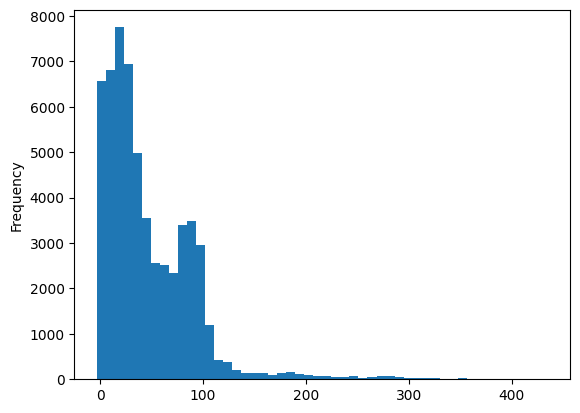

In [856]:
df['lead_time'].plot(kind='hist', bins=50)

<Axes: xlabel='lead_time', ylabel='Density'>

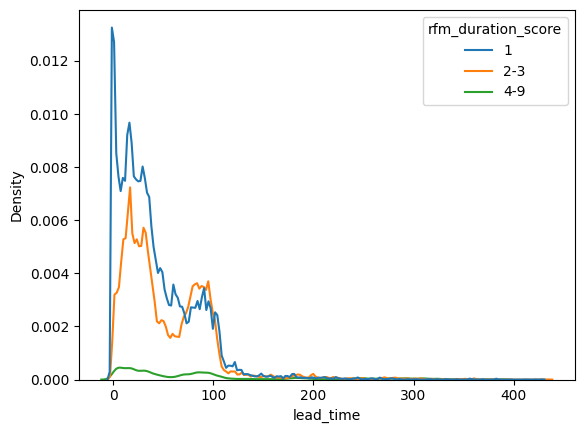

In [857]:
sns.kdeplot(data=df, x='lead_time', bw_adjust=0.2, hue='rfm_duration_score')

<Axes: xlabel='lead_time', ylabel='Density'>

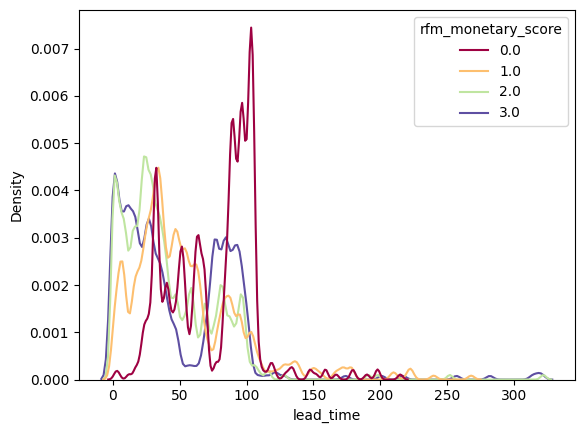

In [858]:
sns.kdeplot(data=df, x='lead_time', bw_adjust=0.2, hue='rfm_monetary_score',palette='Spectral')

<Axes: xlabel='lead_time', ylabel='Count'>

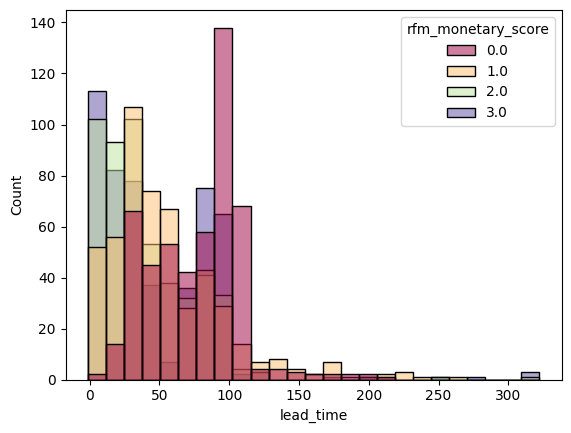

In [859]:
sns.histplot(data=df, x='lead_time', bins=25, hue='rfm_monetary_score',palette='Spectral')

<Axes: xlabel='lead_time', ylabel='Count'>

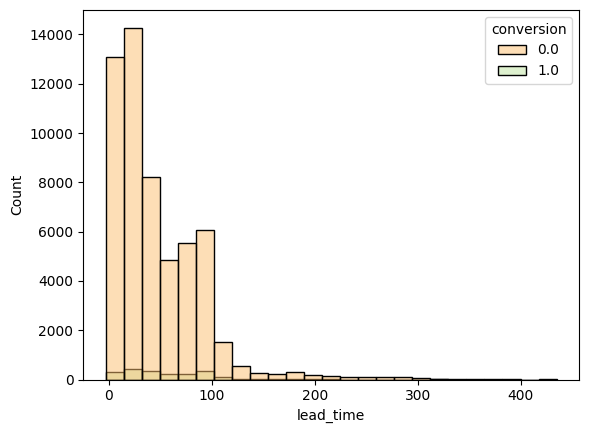

In [860]:
sns.histplot(data=df, x='lead_time', bins=25, hue='conversion',palette='Spectral')

<Axes: xlabel='lead_time', ylabel='picked_price_p_night'>

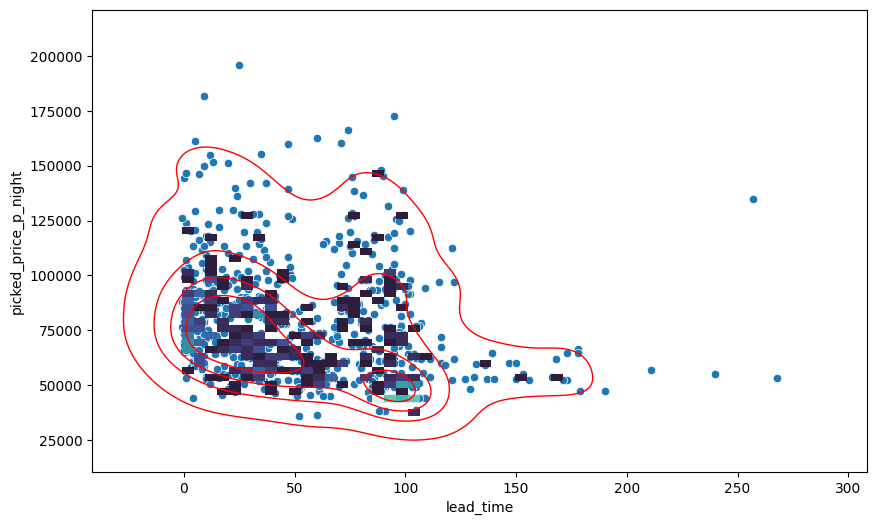

In [861]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(ax=ax, data=hotel1, x='lead_time', y='picked_price_p_night')
sns.histplot(ax=ax, data=hotel1, x='lead_time', y='picked_price_p_night', bins=50, cmap="mako",pthresh=.001)
sns.kdeplot(ax=ax, data=hotel1, x='lead_time', y='picked_price_p_night', levels=5, color="r", linewidths=1)

<Axes: xlabel='nights', ylabel='lead_time'>

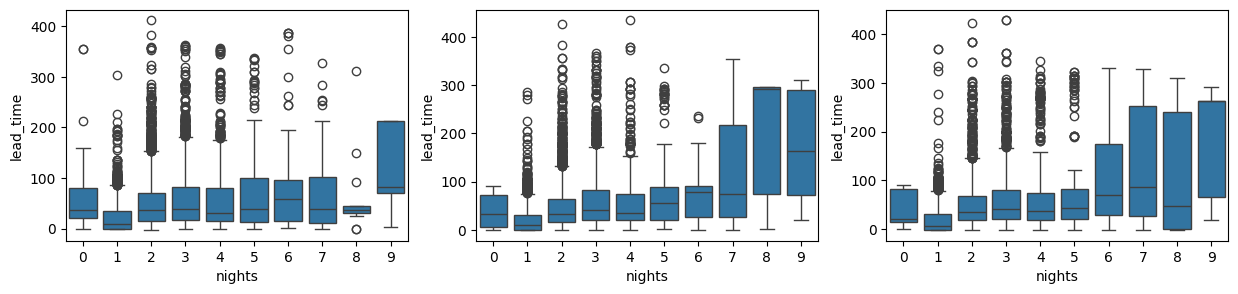

In [862]:
# Hows does the stay duration influences the lead time?
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
sns.boxplot(ax=ax1 ,data=hotel1, y='lead_time', x='nights')
sns.boxplot(ax=ax2 ,data=hotel2, y='lead_time', x='nights')
sns.boxplot(ax=ax3 ,data=hotel3, y='lead_time', x='nights')

In [863]:
hotel1[['rfm_duration_score', 'lead_time']].groupby(by='rfm_duration_score').mean()

lead_time
rfm_duration_score           
1                   43.064869
2-3                 52.144677
4-9                 70.057143

<Axes: xlabel='rfm_duration_score', ylabel='lead_time'>

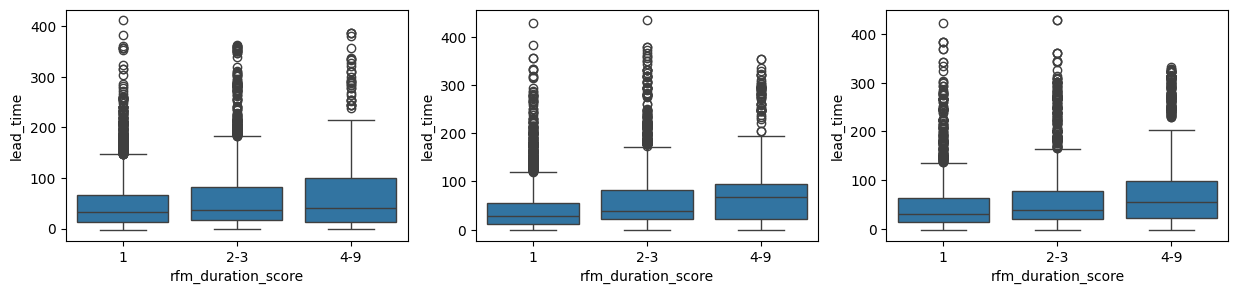

In [864]:
# Hows does the stay duration influences the lead time?
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
sns.boxplot(ax=ax1 ,data=hotel1, y='lead_time', x='rfm_duration_score')
sns.boxplot(ax=ax2 ,data=hotel2, y='lead_time', x='rfm_duration_score')
sns.boxplot(ax=ax3 ,data=hotel3, y='lead_time', x='rfm_duration_score')

# EDA and Segmentation


- what are the most important variables for segmentation?

<Axes: xlabel='nights', ylabel='Count'>

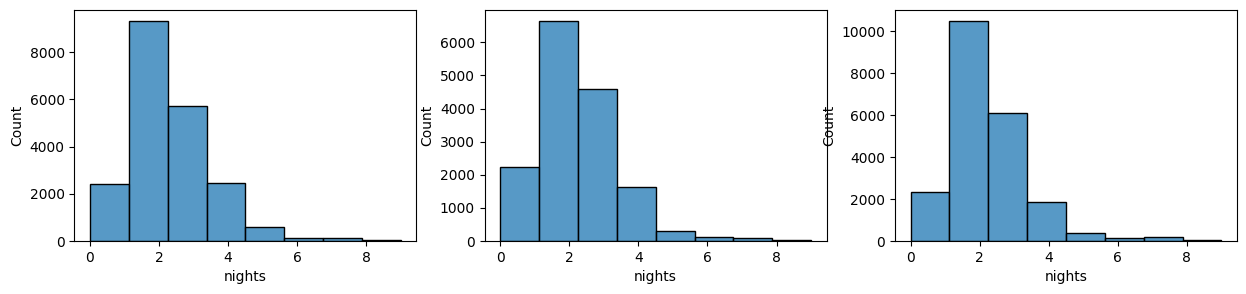

In [865]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.histplot(ax=ax1, data=hotel1, x='nights', bins=8)
sns.histplot(ax=ax2, data=hotel2, x='nights', bins=8)
sns.histplot(ax=ax3, data=hotel3, x='nights', bins=8)

<Axes: xlabel='nights', ylabel='picked_price_p_night'>

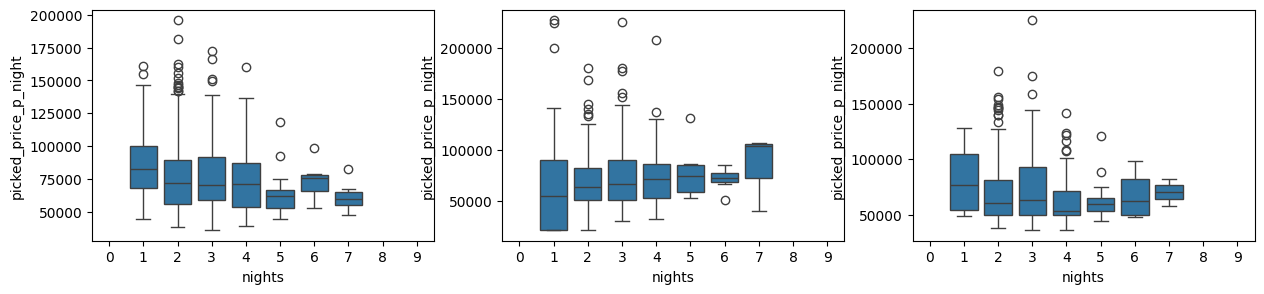

In [866]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.boxplot(ax=ax1, data=hotel1, x ='nights', y='picked_price_p_night')
sns.boxplot(ax=ax2, data=hotel2, x ='nights', y='picked_price_p_night')
sns.boxplot(ax=ax3, data=hotel3, x ='nights', y='picked_price_p_night')

<Axes: xlabel='picked_price_p_night', ylabel='Count'>

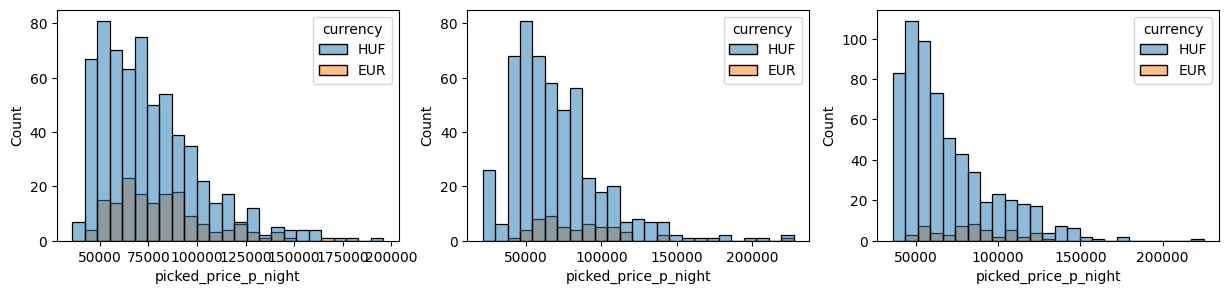

In [867]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.histplot(ax=ax1, data=hotel1, x='picked_price_p_night', bins=25, hue='currency')
sns.histplot(ax=ax2, data=hotel2, x='picked_price_p_night', bins=25, hue='currency')
sns.histplot(ax=ax3, data=hotel3, x='picked_price_p_night', bins=25, hue='currency')  #lognorm distribution

In [868]:
hotel1.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'picked_price_median', 'picked_price_p_night', 'picked_room',
       'baby_bed', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_discount_total', 'redeemed_loyalty_points_total',
       'rfm_monetary_score', 'rfm_duration_score', '0_age', '1_age', '2_age',
       '3_age', '4_age', 'ROOMAA_room_price_min', 'offered_price_median',
       'offered_price_min', 'offered_price_max', 'ROOMAA_room_price_max',
       'ROOMBB_room_price_min', 'ROOMBB_room_price_max',
       'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
       'ROOMDD_room_price_min', 'ROOMDD_room_price_max',

In [869]:
# this drops the duplicates in uuid!!! - keeping only the last room search
pd.concat([df[['hotel_id','uuid','adults', 'children', 'if_children', 'conversion','sel_num_of_rooms',
               'picked_price_p_night','children_age_mean', 'baby_bed','rfm_duration_score']],
           df[['upsell_total_price', 'loyalty_discount_total','redeemed_loyalty_points_total']].replace(to_replace=0, value=None)], axis=1).drop_duplicates(subset='uuid', keep='last').drop(columns='uuid').groupby(by=['hotel_id','rfm_duration_score']).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

In [870]:
# with every room search
pd.concat([df[['hotel_id','adults', 'children', 'if_children', 'conversion','sel_num_of_rooms',
               'picked_price_p_night','children_age_mean', 'baby_bed','rfm_duration_score']],
           df[['upsell_total_price', 'loyalty_discount_total','redeemed_loyalty_points_total']].replace(to_replace=0, value=None)], axis=1).groupby(by=['hotel_id','rfm_duration_score']).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

In [871]:
# groupby if=weekend

In [872]:
# with every conversion
pd.concat([df[['hotel_id','adults', 'children', 'if_children','sel_num_of_rooms','nights',
               'children_age_mean', 'baby_bed','rfm_monetary_score']],
           df[['upsell_total_price', 'loyalty_discount_total','redeemed_loyalty_points_total']].replace(to_replace=0, value=None)], axis=1).groupby(by=['hotel_id','rfm_monetary_score']).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

In [873]:
df[df['if_children']==True][['hotel_id','children','rfm_monetary_score']].groupby(by=['hotel_id','rfm_monetary_score']).mean()

children
hotel_id rfm_monetary_score          
hotel_1  0.0                 1.227273
         1.0                 1.818182
         2.0                 1.718310
         3.0                 1.755102
hotel_2  0.0                 1.240000
         1.0                 1.200000
         2.0                 1.534884
         3.0                 1.657534
hotel_3  0.0                 1.571429
         1.0                 1.157895
         2.0                 1.533333
         3.0                 1.732143

Text(0, 0.5, 'average number of childrens')

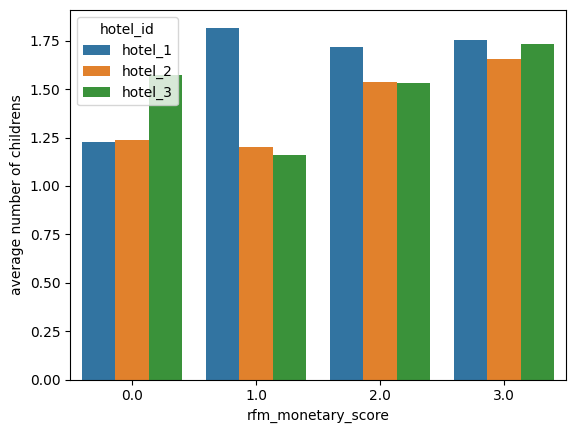

In [874]:
sns.barplot(data=df[df['if_children']==True][['hotel_id','children','rfm_monetary_score']].groupby(by=['hotel_id','rfm_monetary_score']).mean().reset_index(), x='rfm_monetary_score', y='children', hue='hotel_id')
plt.ylabel('average number of childrens')

<Axes: xlabel='rfm_monetary_score'>

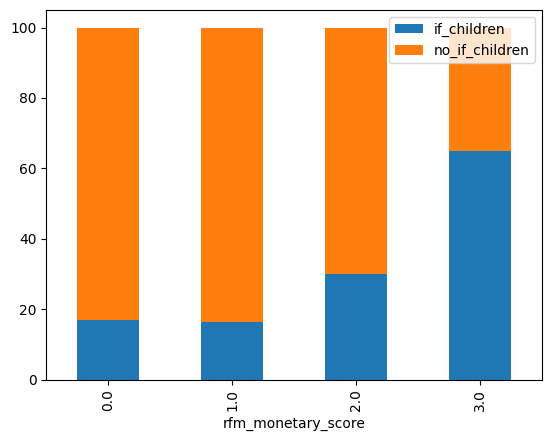

In [875]:
test = (hotel1[['if_children','rfm_monetary_score']].groupby(by='rfm_monetary_score').mean()*100).reset_index()
test['no_if_children'] = 100-test['if_children']
test.plot(x='rfm_monetary_score',kind='bar',stacked=True)

<Axes: xlabel='if_children', ylabel='rfm_monetary_score'>

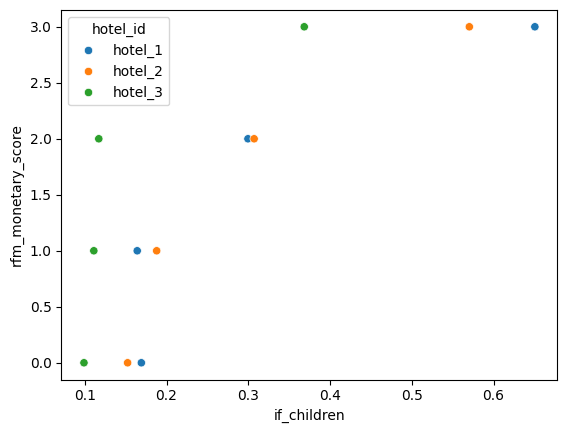

In [876]:
sns.scatterplot(data=df[['hotel_id','if_children','rfm_monetary_score']].groupby(by=['hotel_id','rfm_monetary_score']).mean().reset_index(), y='rfm_monetary_score', x='if_children', hue='hotel_id')

In [877]:
df[['hotel_id','children','rfm_monetary_score']].groupby(by=['hotel_id','rfm_monetary_score']).mean().reset_index()

hotel_id  rfm_monetary_score  children
0   hotel_1                 0.0  0.207692
1   hotel_1                 1.0  0.298507
2   hotel_1                 2.0  0.514768
3   hotel_1                 3.0  1.141593
4   hotel_2                 0.0  0.189024
5   hotel_2                 1.0  0.225564
6   hotel_2                 2.0  0.471429
7   hotel_2                 3.0  0.945312
8   hotel_3                 0.0  0.155660
9   hotel_3                 1.0  0.128655
10  hotel_3                 2.0  0.179688
11  hotel_3                 3.0  0.638158

In [878]:
# with every conversion
pd.concat([df[['hotel_id','adults', 'if_children','sel_num_of_rooms','nights','picked_price_p_night','conversion']],
           df[['upsell_total_price', 'loyalty_discount_total','redeemed_loyalty_points_total']].replace(to_replace=0, value=None)], axis=1).groupby(by=['hotel_id','if_children']).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

<Axes: xlabel='if_children', ylabel='picked_price_p_night'>

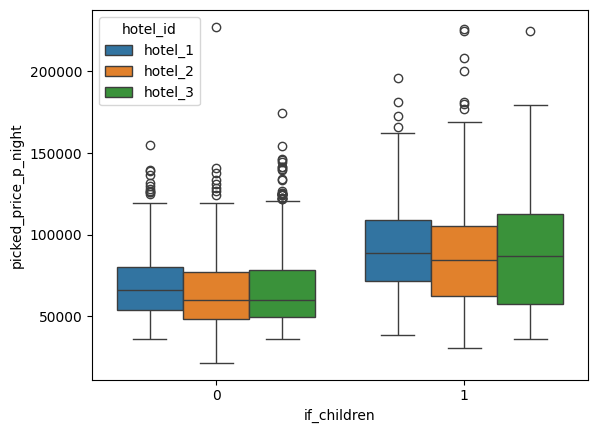

In [879]:
sns.boxplot(data=df, x='if_children', y='picked_price_p_night', hue='hotel_id')

<Axes: xlabel='hotel_id', ylabel='upsell_total_price'>

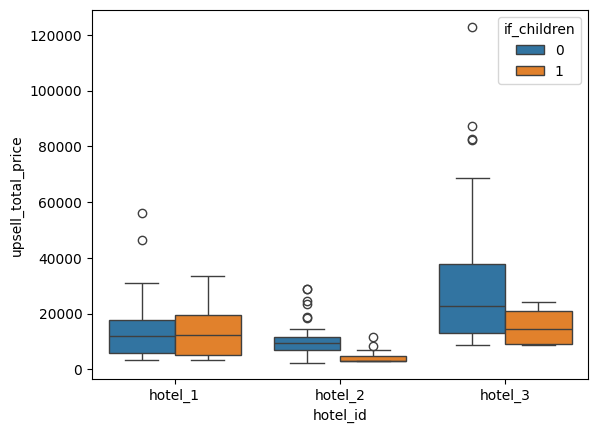

In [880]:
sns.boxplot(data=df[df['upsell_total_price']>0], x='hotel_id', y='upsell_total_price', hue='if_children')

<Axes: xlabel='if_children', ylabel='conversion'>

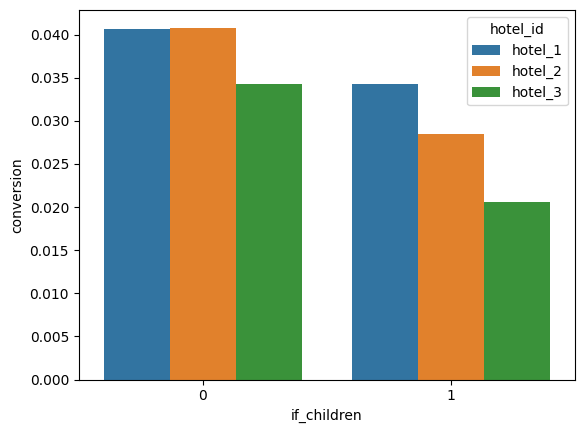

In [881]:
sns.barplot(data=df[['hotel_id','if_children','conversion']].groupby(by=['hotel_id','if_children']).mean(), x='if_children', y='conversion', hue='hotel_id')

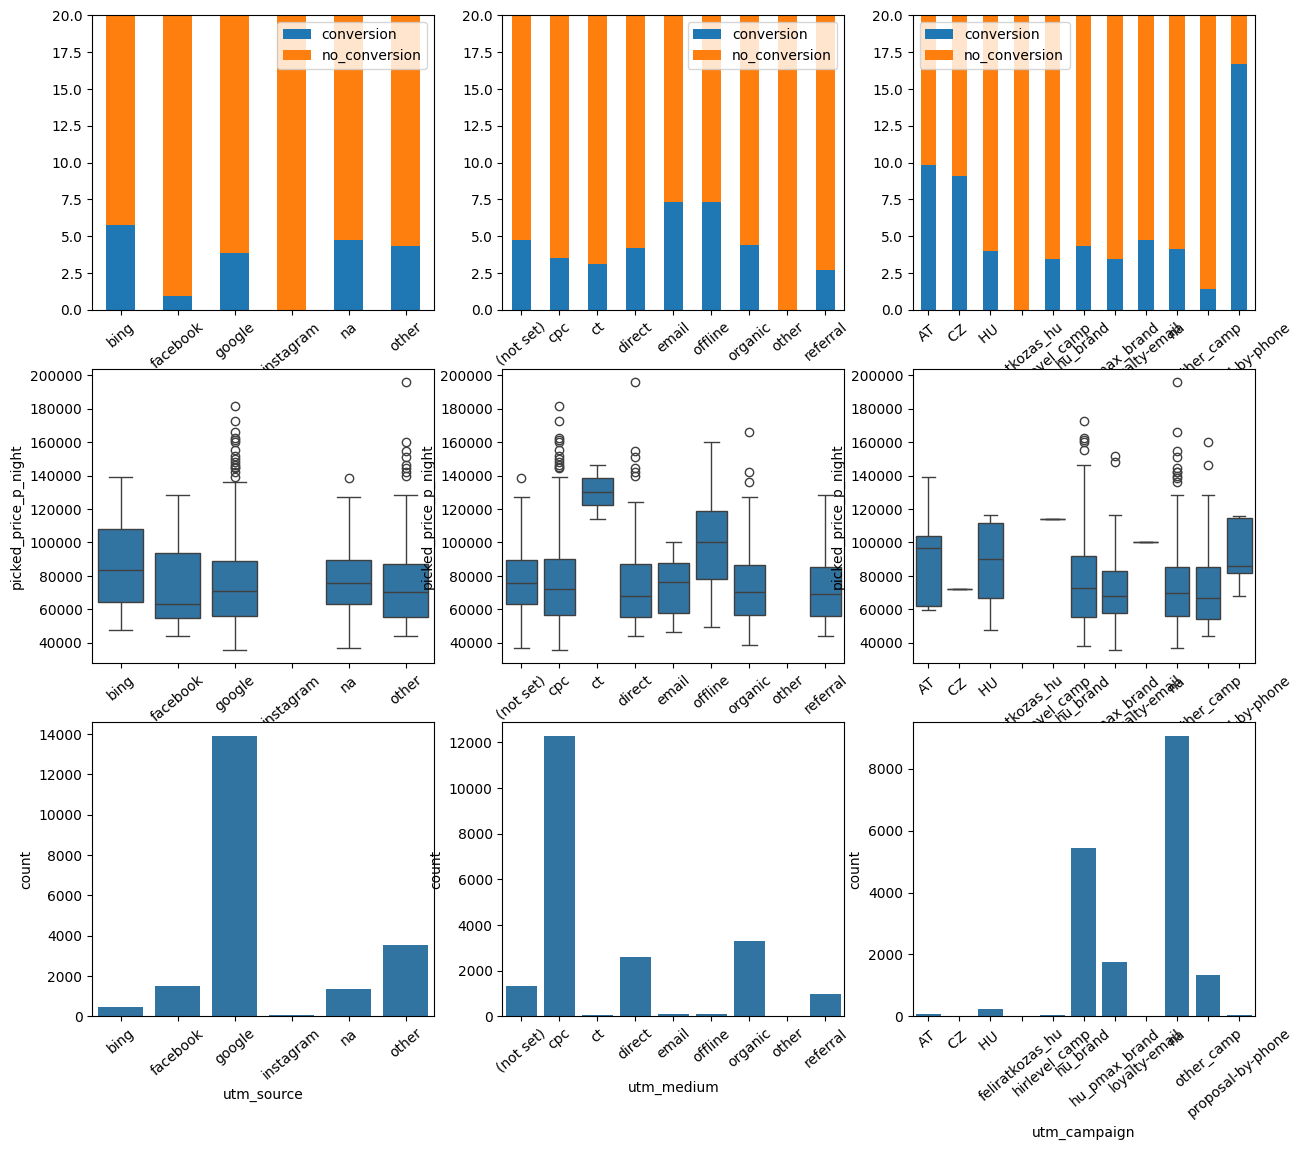

In [882]:
# stacked barplot according to utm_campaign, medium and source for each hotel

fig, ((ax1, ax2, ax3), (ax21, ax22, ax23), (ax31, ax32, ax33)) = plt.subplots(3,3, figsize=(15,13))

test = (hotel1[['conversion','utm_source']].groupby(by='utm_source').mean()*100).reset_index()
test['no_conversion'] = 100-test['conversion']
test.plot(x='utm_source',kind='bar',stacked=True, ax=ax1).tick_params(axis='x', rotation=40)
ax1.set_ylim(top=20)

test2 = (hotel1[['conversion','utm_medium']].groupby(by='utm_medium').mean()*100).reset_index()
test2['no_conversion'] = 100-test2['conversion']
test2.plot(x='utm_medium',kind='bar',stacked=True, ax=ax2).tick_params(axis='x', rotation=40)
ax2.set_ylim(top=20)

test3 = (hotel1[['conversion','utm_campaign']].groupby(by='utm_campaign').mean()*100).reset_index()
test3['no_conversion'] = 100-test3['conversion']
test3.plot(x='utm_campaign',kind='bar',stacked=True, ax=ax3).tick_params(axis='x', rotation=40)
ax3.set_ylim(top=20)

sns.boxplot(data=hotel1, x='utm_source', y='picked_price_p_night', ax=ax21, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel1, x='utm_medium', y='picked_price_p_night', ax=ax22, order=['(not set)', 'cpc', 'ct', 'direct', 'email', 'offline','organic','other','referral']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel1, x='utm_campaign', y='picked_price_p_night', ax=ax23, order=['AT ', 'CZ ', 'HU ', 'feliratkozas_hu', 'hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone']).tick_params(axis='x', rotation=40)

sns.countplot(data=hotel1, x='utm_source', ax=ax31, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel1, x='utm_medium', ax=ax32, order=['(not set)', 'cpc', 'ct', 'direct', 'email', 'offline','organic','other','referral']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel1, x='utm_campaign', ax=ax33, order=['AT ', 'CZ ', 'HU ', 'feliratkozas_hu', 'hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone']).tick_params(axis='x', rotation=40)

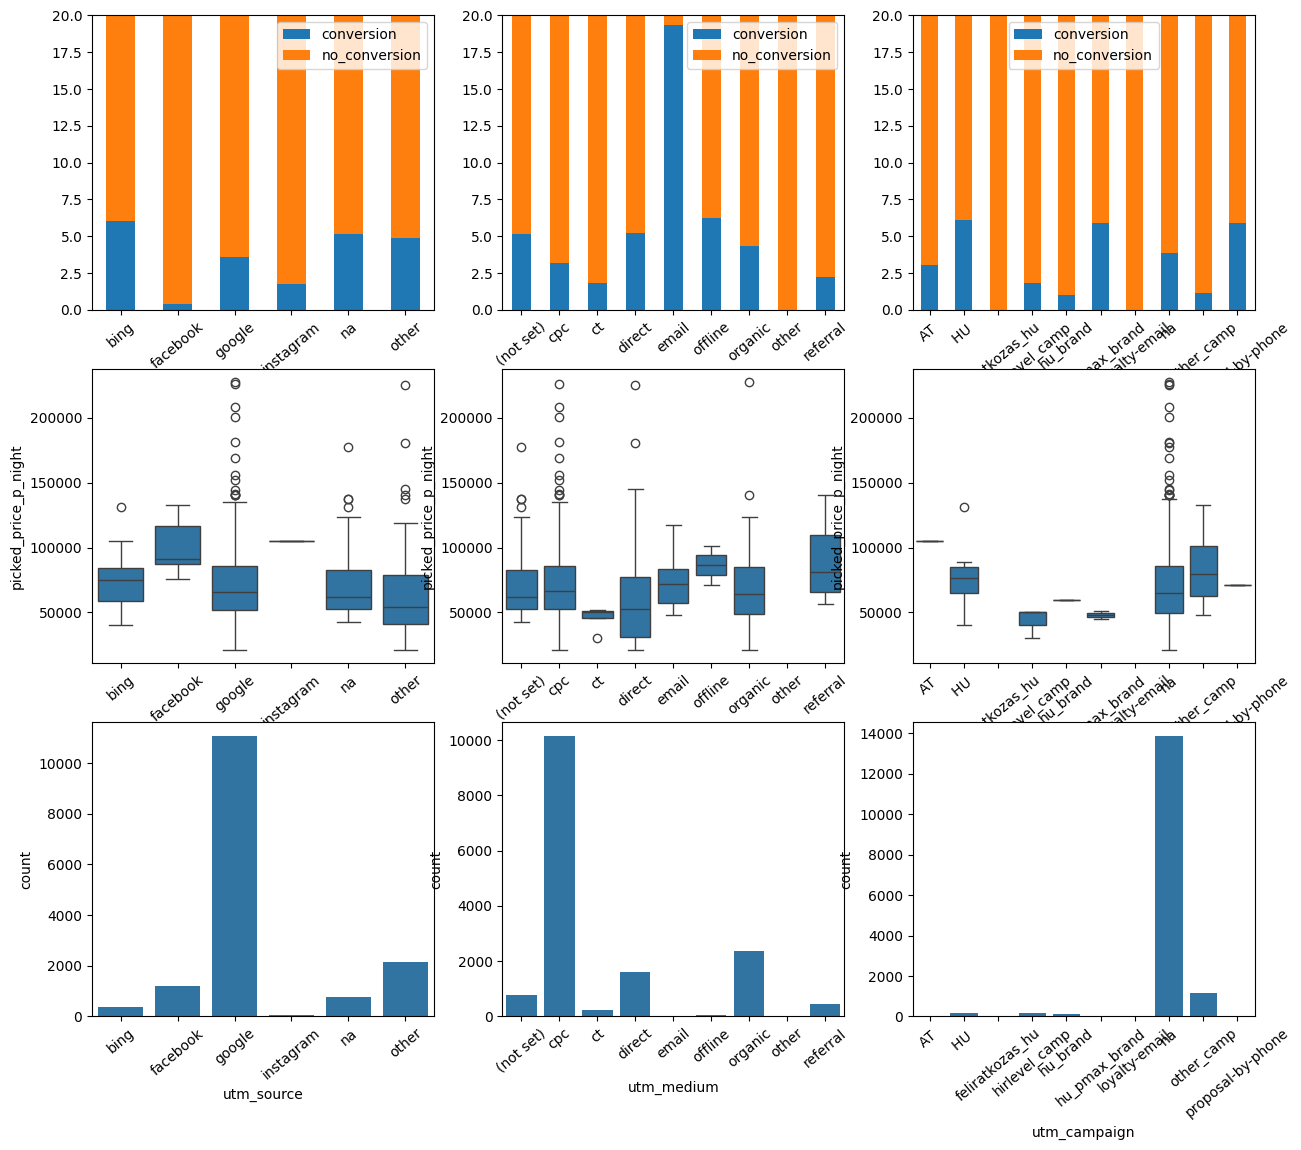

In [883]:
fig, ((ax1, ax2, ax3), (ax21, ax22, ax23), (ax31, ax32, ax33)) = plt.subplots(3,3, figsize=(15,13))

test = (hotel2[['conversion','utm_source']].groupby(by='utm_source').mean()*100).reset_index()
test['no_conversion'] = 100-test['conversion']
test.plot(x='utm_source',kind='bar',stacked=True, ax=ax1).tick_params(axis='x', rotation=40)
ax1.set_ylim(top=20)

test2 = (hotel2[['conversion','utm_medium']].groupby(by='utm_medium').mean()*100).reset_index()
test2['no_conversion'] = 100-test2['conversion']
test2.plot(x='utm_medium',kind='bar',stacked=True, ax=ax2).tick_params(axis='x', rotation=40)
ax2.set_ylim(top=20)

test3 = (hotel2[['conversion','utm_campaign']].groupby(by='utm_campaign').mean()*100).reset_index()
test3['no_conversion'] = 100-test3['conversion']
test3.plot(x='utm_campaign',kind='bar',stacked=True, ax=ax3).tick_params(axis='x', rotation=40)
ax3.set_ylim(top=20)

sns.boxplot(data=hotel2, x='utm_source', y='picked_price_p_night', ax=ax21, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel2, x='utm_medium', y='picked_price_p_night', ax=ax22, order=['(not set)', 'cpc', 'ct', 'direct', 'email', 'offline','organic', 'other', 'referral']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel2, x='utm_campaign', y='picked_price_p_night', ax=ax23, order=['AT ', 'HU ', 'feliratkozas_hu', 'hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone']).tick_params(axis='x', rotation=40)

sns.countplot(data=hotel2, x='utm_source', ax=ax31, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel2, x='utm_medium', ax=ax32, order=['(not set)', 'cpc', 'ct', 'direct', 'email', 'offline','organic', 'other', 'referral']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel2, x='utm_campaign', ax=ax33, order=['AT ', 'HU ', 'feliratkozas_hu', 'hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone']).tick_params(axis='x', rotation=40)

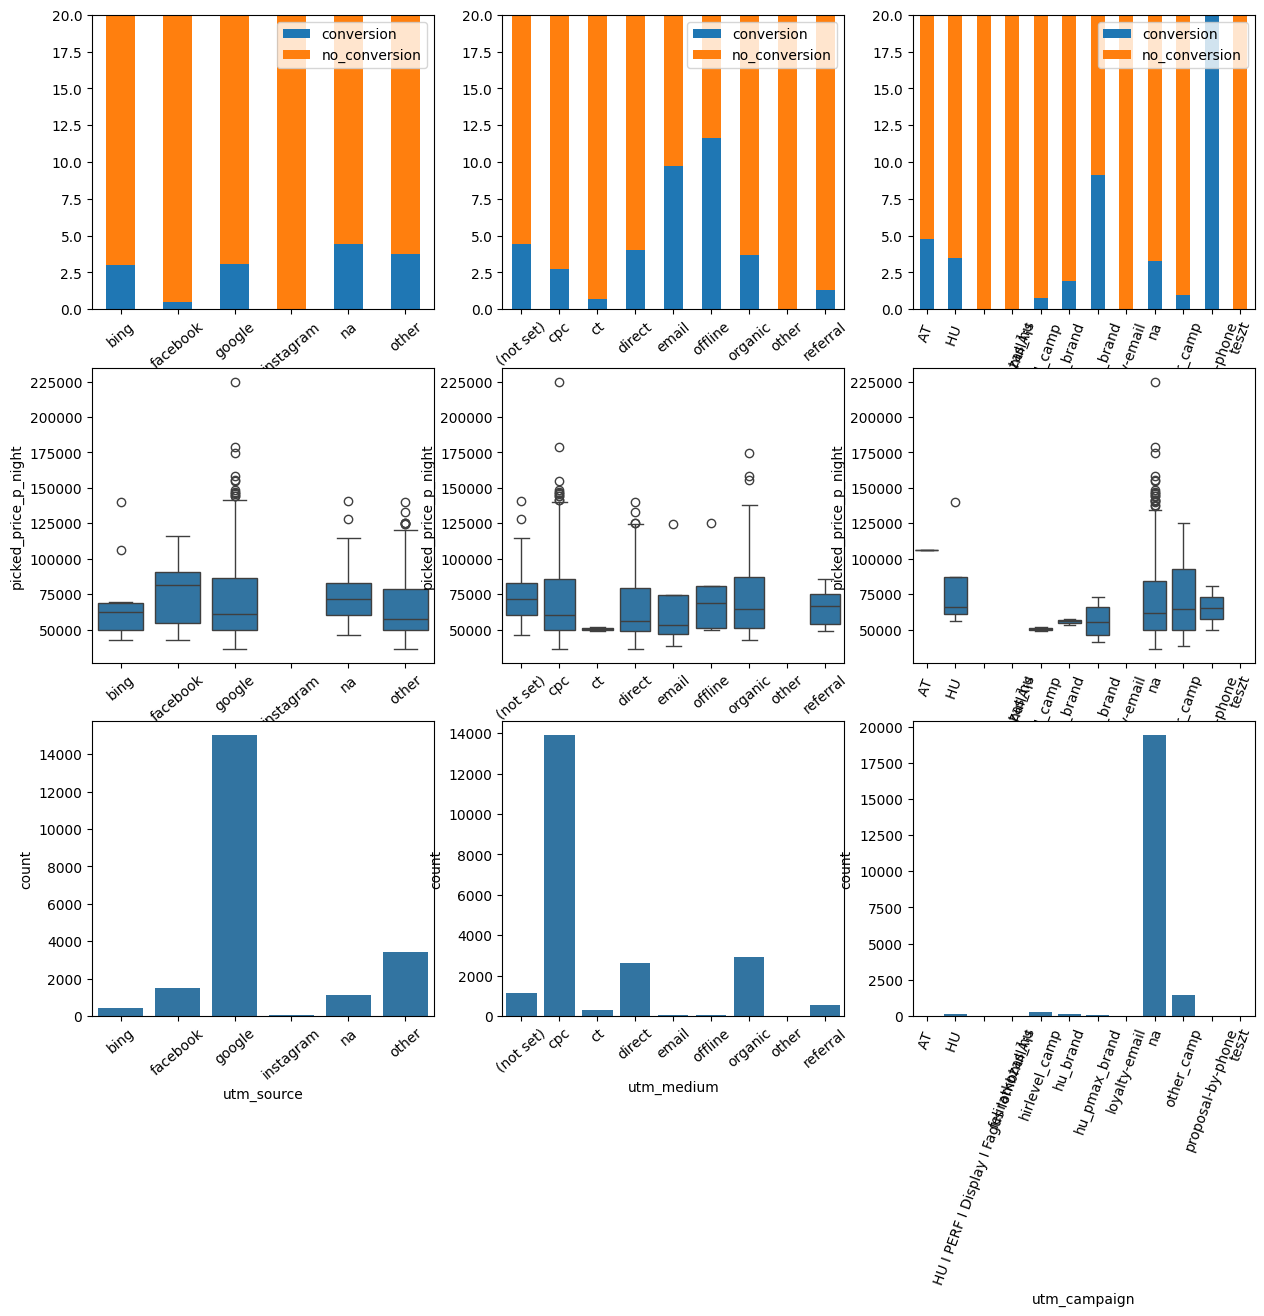

In [884]:
fig, ((ax1, ax2, ax3), (ax21, ax22, ax23), (ax31, ax32, ax33)) = plt.subplots(3,3, figsize=(15,13))

test = (hotel3[['conversion','utm_source']].groupby(by='utm_source').mean()*100).reset_index()
test['no_conversion'] = 100-test['conversion']
test.plot(x='utm_source',kind='bar',stacked=True, ax=ax1).tick_params(axis='x', rotation=40)
ax1.set_ylim(top=20)

test2 = (hotel3[['conversion','utm_medium']].groupby(by='utm_medium').mean()*100).reset_index()
test2['no_conversion'] = 100-test2['conversion']
test2.plot(x='utm_medium',kind='bar',stacked=True, ax=ax2).tick_params(axis='x', rotation=40)
ax2.set_ylim(top=20)

test3 = (hotel3[['conversion','utm_campaign']].groupby(by='utm_campaign').mean()*100).reset_index()
test3['no_conversion'] = 100-test3['conversion']
test3.plot(x='utm_campaign',kind='bar',stacked=True, ax=ax3).tick_params(axis='x', rotation=70)
ax3.set_ylim(top=20)

sns.boxplot(data=hotel3, x='utm_source', y='picked_price_p_night', ax=ax21, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel3, x='utm_medium', y='picked_price_p_night', ax=ax22, order=['(not set)', 'cpc', 'ct', 'direct', 'email', 'offline','organic', 'other', 'referral']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel3, x='utm_campaign', y='picked_price_p_night', ax=ax23, order=['AT ', 'HU ', 'HU I PERF I Display I Fagus lombhullÃ¡s', 'feliratkozas_hu','hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone','teszt']).tick_params(axis='x', rotation=70)

sns.countplot(data=hotel3, x='utm_source', ax=ax31, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel3, x='utm_medium', ax=ax32, order=['(not set)', 'cpc', 'ct', 'direct', 'email', 'offline','organic', 'other', 'referral']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel3, x='utm_campaign', ax=ax33, order=['AT ', 'HU ', 'HU I PERF I Display I Fagus lombhullÃ¡s', 'feliratkozas_hu','hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone','teszt']).tick_params(axis='x', rotation=70)

<Axes: xlabel='currency', ylabel='nights'>

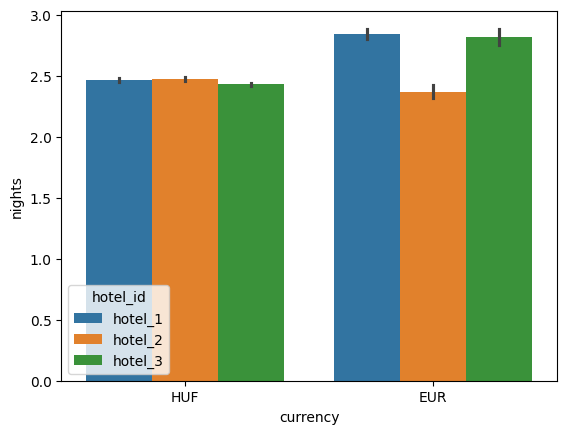

In [885]:
sns.barplot(data=df, x='currency', y='nights', hue='hotel_id', estimator='mean')

In [886]:
df.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'picked_price_median', 'picked_price_p_night', 'picked_room',
       'baby_bed', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_discount_total', 'redeemed_loyalty_points_total', 'hotel_id',
       'rfm_monetary_score', 'rfm_duration_score', '0_age', '1_age', '2_age',
       '3_age', '4_age', 'ROOMAA_room_price_min', 'offered_price_median',
       'offered_price_min', 'offered_price_max', 'ROOMAA_room_price_max',
       'ROOMBB_room_price_min', 'ROOMBB_room_price_max',
       'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
       'ROOMDD_room_price_min', 'ROOMDD_room

<Axes: xlabel='rfm_duration_score', ylabel='children_age_mean'>

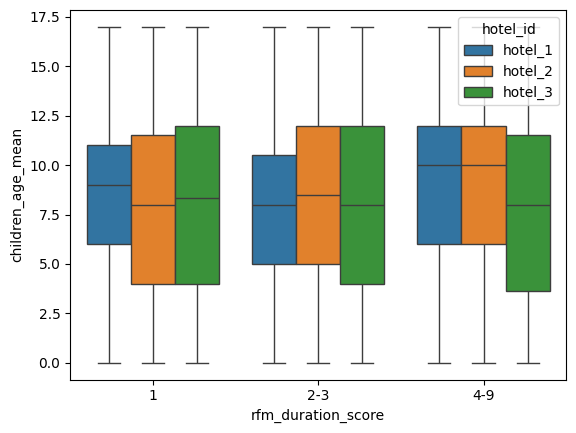

In [887]:
sns.boxplot(data=df[df['if_children']==True], x='rfm_duration_score', y='children_age_mean', hue='hotel_id')

<Axes: xlabel='currency'>

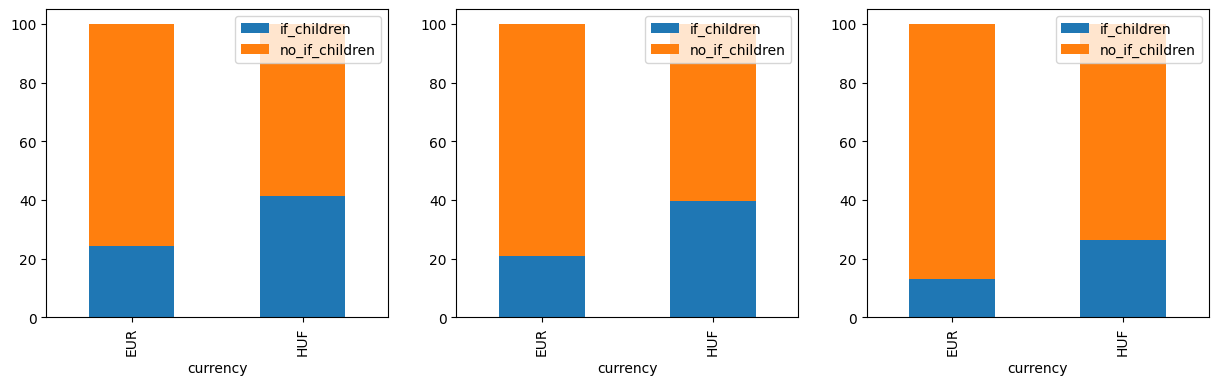

In [888]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

test = (hotel1[['if_children','currency']].groupby(by='currency').mean()*100).reset_index()
test['no_if_children'] = 100-test['if_children']
test.plot(ax=ax1, x='currency',kind='bar',stacked=True)

test = (hotel2[['if_children','currency']].groupby(by='currency').mean()*100).reset_index()
test['no_if_children'] = 100-test['if_children']
test.plot(ax=ax2, x='currency',kind='bar',stacked=True)

test = (hotel3[['if_children','currency']].groupby(by='currency').mean()*100).reset_index()
test['no_if_children'] = 100-test['if_children']
test.plot(ax=ax3, x='currency',kind='bar',stacked=True)

(0.0, 20.0)

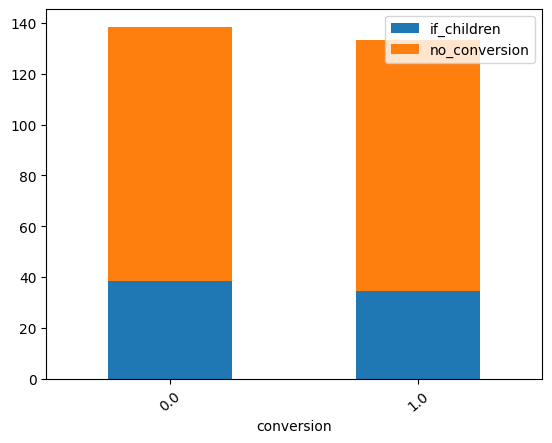

In [889]:
test = (hotel1[['if_children','conversion']].groupby(by='conversion').mean()*100).reset_index()
test['no_conversion'] = 100-test['conversion']
test.plot(x='conversion',kind='bar',stacked=True).tick_params(axis='x', rotation=40)
ax1.set_ylim(top=20)

In [890]:
df[['hotel_id','picked_price_p_night','rfm_duration_score']].groupby(by=['hotel_id','rfm_duration_score']).median()

picked_price_p_night
hotel_id rfm_duration_score                      
hotel_1  1                           73440.000000
         2-3                         70848.147778
         4-9                         62172.000000
hotel_2  1                           63575.550000
         2-3                         67321.945000
         4-9                         74187.036667
hotel_3  1                           61261.000000
         2-3                         61499.507867
         4-9                         61371.000000

# Search patterns and key variables

- what are the visitors looking for?

In [891]:
df.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'picked_price_median', 'picked_price_p_night', 'picked_room',
       'baby_bed', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_discount_total', 'redeemed_loyalty_points_total', 'hotel_id',
       'rfm_monetary_score', 'rfm_duration_score', '0_age', '1_age', '2_age',
       '3_age', '4_age', 'ROOMAA_room_price_min', 'offered_price_median',
       'offered_price_min', 'offered_price_max', 'ROOMAA_room_price_max',
       'ROOMBB_room_price_min', 'ROOMBB_room_price_max',
       'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
       'ROOMDD_room_price_min', 'ROOMDD_room

<Axes: xlabel='arrival'>

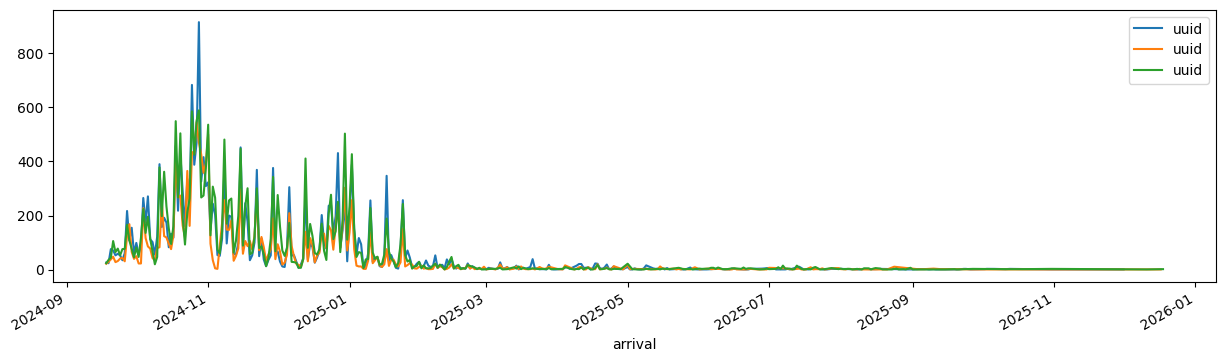

In [892]:
fig, ax1 = plt.subplots(1,1,figsize=(15,4))
hotel1[['arrival','uuid']].groupby(by='arrival').count().plot(ax=ax1)
hotel2[['arrival','uuid']].groupby(by='arrival').count().plot(ax=ax1)
hotel3[['arrival','uuid']].groupby(by='arrival').count().plot(ax=ax1)

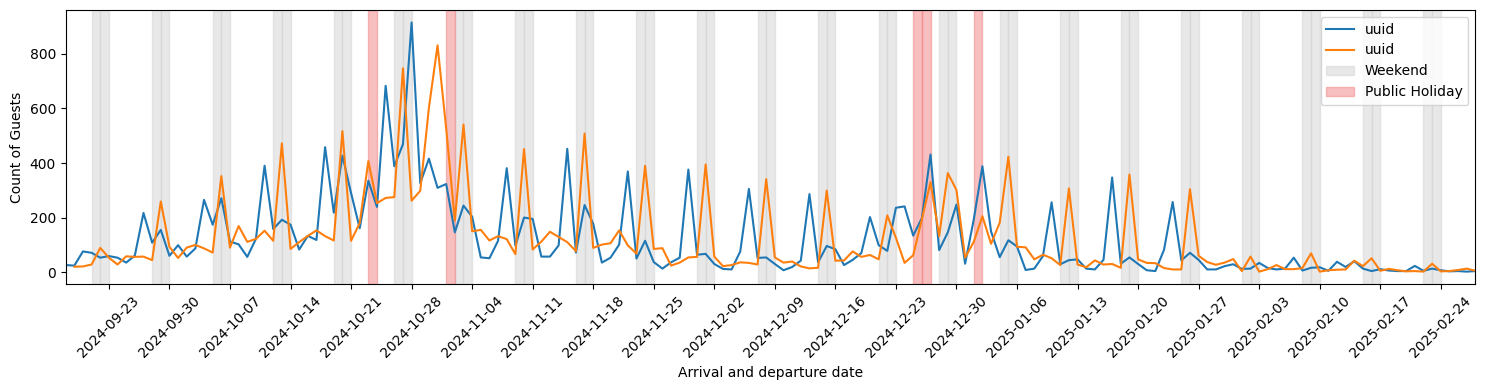

In [893]:
import matplotlib.dates as mdates
from datetime import timedelta

# List of Hungarian public holidays (2024-2025, adjust for your data range)
public_holidays = [
    "2024-10-23",  # Revolution Day
    "2024-11-01",  # All Saints' Day
    "2024-12-25",  # Christmas Day
    "2024-12-26",  # Second Day of Christmas
    "2025-01-01",  # New Year's Day
    "2025-03-15",  # Revolution Memorial Day
]

# Convert public holidays to datetime
public_holidays = pd.to_datetime(public_holidays)

# Create the figure and plot
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))

# Plot data for hotel1, hotel2, hotel3
hotel1[hotel1['arrival'] < '2025-03-01'][['arrival', 'uuid']].groupby(by='arrival').count().plot(ax=ax1, label='Hotel 1')
hotel1[hotel1['departure'] < '2025-03-01'][['departure', 'uuid']].groupby(by='departure').count().plot(ax=ax1, label='Hotel 1')

# Highlight weekends
start_date = pd.to_datetime('2024-09-01')  # Adjust based on your data range
end_date = pd.to_datetime('2025-03-01')
current_date = start_date

while current_date <= end_date:
    if current_date.weekday() >= 5:  # Saturday (5) and Sunday (6)
        ax1.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
    current_date += timedelta(days=1)

# Highlight public holidays
for holiday in public_holidays:
    if start_date <= holiday <= end_date:
        ax1.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)

# Format x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
plt.xticks(rotation=45)

ax1.set_xlabel('Arrival and departure date')
ax1.set_ylabel('Count of Guests')
plt.legend()
plt.tight_layout()
plt.show()


<Axes: xlabel='departure_day_of_week', ylabel='count'>

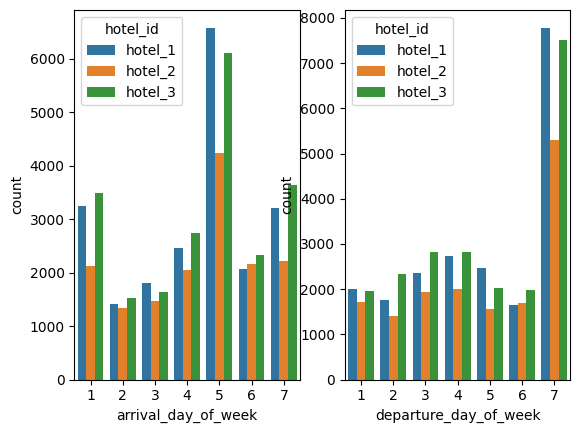

In [894]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.countplot(ax=ax1, data=df, x='arrival_day_of_week', hue='hotel_id')
sns.countplot(ax=ax2, data=df, x='departure_day_of_week', hue='hotel_id')

<Axes: xlabel='arrival_day_of_week'>

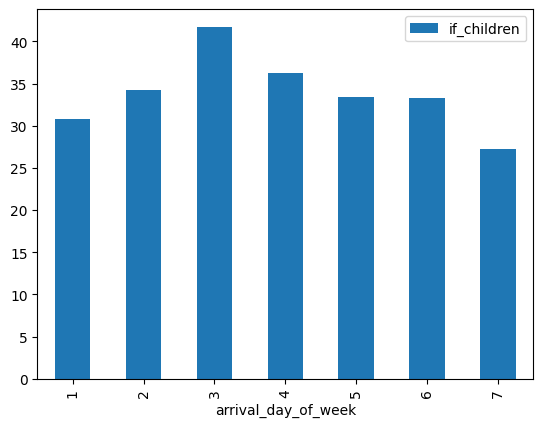

In [895]:
(df[['if_children','arrival_day_of_week']].groupby(by='arrival_day_of_week').mean()*100).plot(kind='bar')

<Axes: xlabel='departure_day_of_week'>

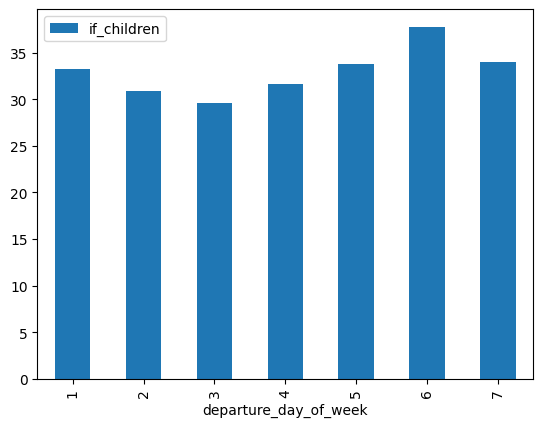

In [896]:
(df[['if_children','departure_day_of_week']].groupby(by='departure_day_of_week').mean()*100).plot(kind='bar')

<Axes: xlabel='day_of_week', ylabel='count'>

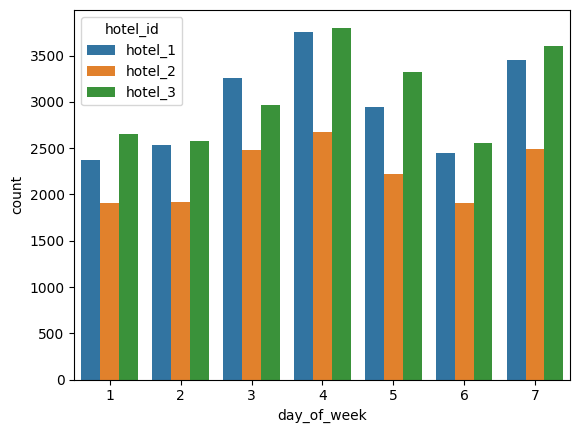

In [897]:
# on which day the guests search for hotel rooms?
sns.countplot(data=df, x='day_of_week', hue='hotel_id')

<Axes: xlabel='time_of_day', ylabel='count'>

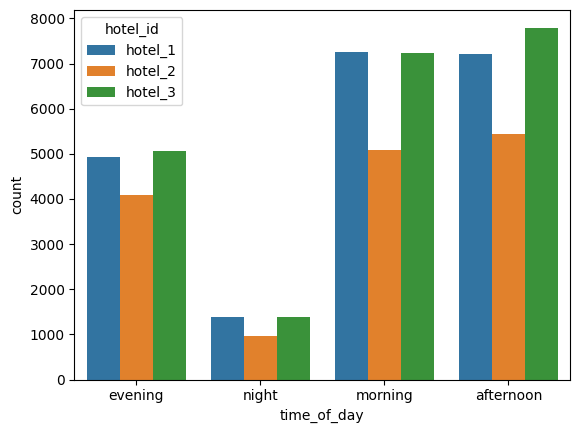

In [898]:
# on which time of the day the guests search for hotel rooms?

sns.countplot(data=df, x='time_of_day', hue='hotel_id')

<Axes: xlabel='currency', ylabel='lead_time'>

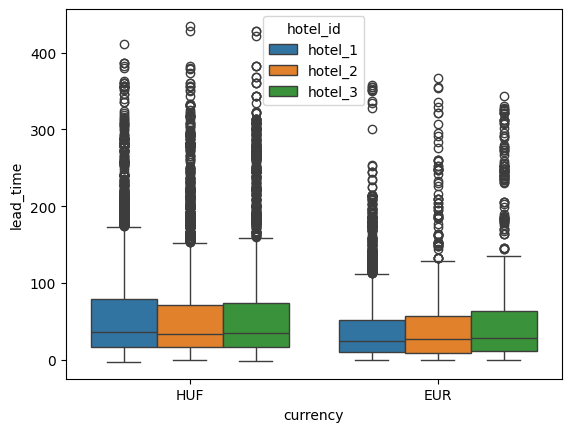

In [899]:
sns.boxplot(data=df[['currency','hotel_id', 'lead_time']], x='currency', y='lead_time', hue='hotel_id')

In [900]:
# define the specific order for 'lead_time_category'
order = ['last_minute', 'short_term', 'medium_term', 'long_term']
df['lead_time_category'] = pd.Categorical(df['lead_time_category'], categories=order, ordered=True)

df[['nights', 'if_children', 'children_age_mean', 'conversion', 'picked_price_p_night','hotel_id','lead_time_category']].groupby(by=['hotel_id', 'lead_time_category'], sort=True).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

<Axes: xlabel='stay_includes_weekend', ylabel='count'>

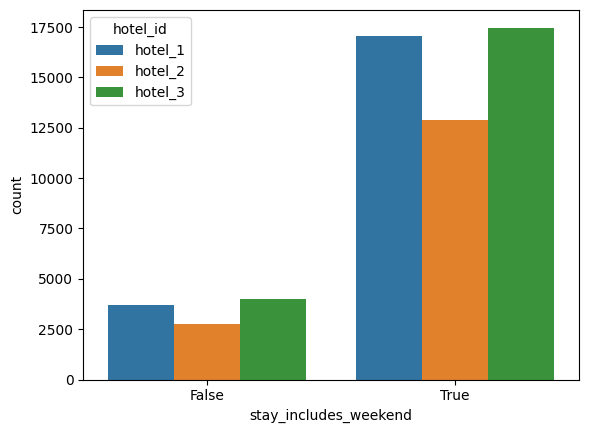

In [901]:
sns.countplot(data=df, x='stay_includes_weekend', hue='hotel_id')

<Axes: xlabel='days_of_week_in_stay'>

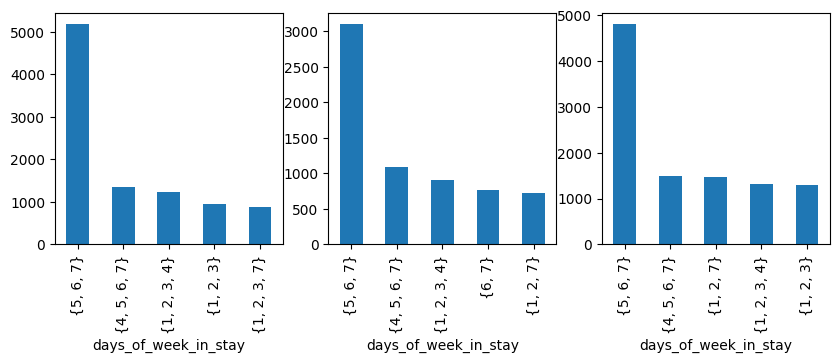

In [902]:
# most common weekday combinations
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,3))
hotel1['days_of_week_in_stay'].value_counts()[:5].plot(kind='bar', ax=ax1)
hotel2['days_of_week_in_stay'].value_counts()[:5].plot(kind='bar', ax=ax2)
hotel3['days_of_week_in_stay'].value_counts()[:5].plot(kind='bar', ax=ax3)

<Axes: xlabel='days_of_week_in_stay'>

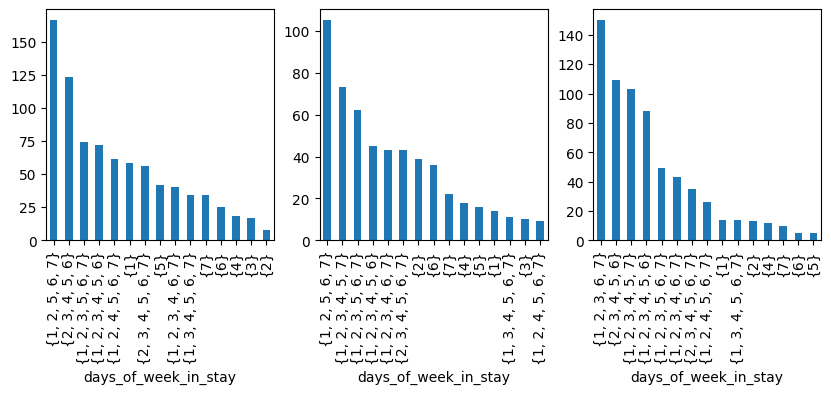

In [903]:
# most uncommon weekday combinations
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,3))
hotel1['days_of_week_in_stay'].value_counts()[-15:].plot(kind='bar', ax=ax1)
hotel2['days_of_week_in_stay'].value_counts()[-15:].plot(kind='bar', ax=ax2)
hotel3['days_of_week_in_stay'].value_counts()[-15:].plot(kind='bar', ax=ax3)

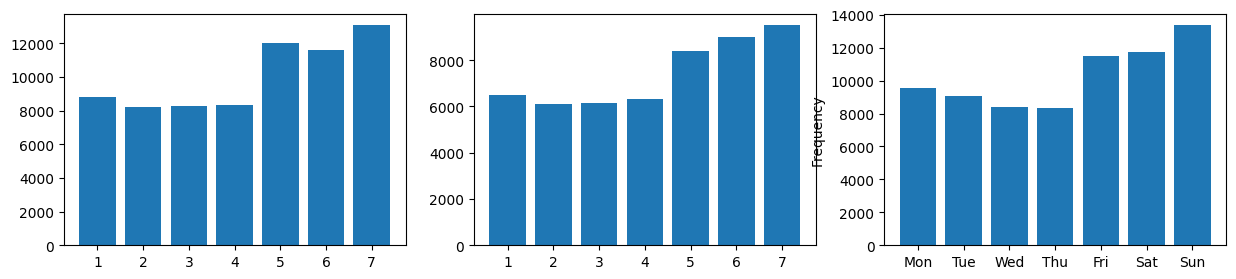

In [904]:
# which days are less popular?
from collections import Counter
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
day_counts_h1 = Counter(day for days in hotel1[hotel1['conversion']==0]['days_of_week_in_stay'] for day in days)
day_counts_h2 = Counter(day for days in hotel2[hotel2['conversion']==0]['days_of_week_in_stay'] for day in days)
day_counts_h3 = Counter(day for days in hotel3[hotel3['conversion']==0]['days_of_week_in_stay'] for day in days)
ax1.bar(day_counts_h1.keys(), day_counts_h1.values())
ax2.bar(day_counts_h2.keys(), day_counts_h2.values())
ax3.bar(day_counts_h3.keys(), day_counts_h3.values())
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel("Frequency")
plt.show()

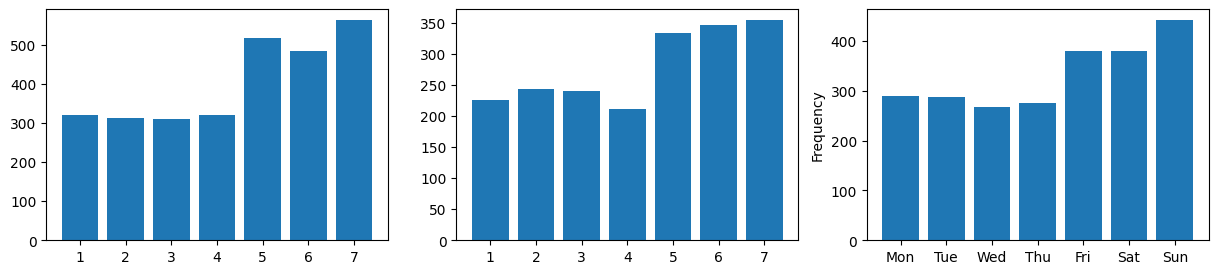

In [905]:
# which days are less popular?
from collections import Counter
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
day_counts_h1 = Counter(day for days in hotel1[hotel1['conversion']==1]['days_of_week_in_stay'] for day in days)
day_counts_h2 = Counter(day for days in hotel2[hotel2['conversion']==1]['days_of_week_in_stay'] for day in days)
day_counts_h3 = Counter(day for days in hotel3[hotel3['conversion']==1]['days_of_week_in_stay'] for day in days)
ax1.bar(day_counts_h1.keys(), day_counts_h1.values())
ax2.bar(day_counts_h2.keys(), day_counts_h2.values())
ax3.bar(day_counts_h3.keys(), day_counts_h3.values())
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel("Frequency")
plt.show()

In [906]:
df[['arrival_is_holiday', 'hotel_id','uuid']].groupby(by=['hotel_id','arrival_is_holiday']).count().style.format('{0:,.2f}').bar(color='#d65f5f')

In [907]:
df[['departure_is_holiday', 'hotel_id','uuid']].groupby(by=['hotel_id','departure_is_holiday']).count().style.format('{0:,.2f}').bar(color='#d65f5f')

In [908]:
df[['stay_includes_weekend', 'hotel_id','picked_price_p_night','upsell_total_price']].groupby(by=['hotel_id','stay_includes_weekend']).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

In [909]:
df.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'picked_price_median', 'picked_price_p_night', 'picked_room',
       'baby_bed', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_discount_total', 'redeemed_loyalty_points_total', 'hotel_id',
       'rfm_monetary_score', 'rfm_duration_score', '0_age', '1_age', '2_age',
       '3_age', '4_age', 'ROOMAA_room_price_min', 'offered_price_median',
       'offered_price_min', 'offered_price_max', 'ROOMAA_room_price_max',
       'ROOMBB_room_price_min', 'ROOMBB_room_price_max',
       'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
       'ROOMDD_room_price_min', 'ROOMDD_room

In [910]:
df[['num_saturdays', 'hotel_id','num_sundays']].groupby(by=['hotel_id']).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

In [911]:
search_and_conversion1 = hotel1[['arrival','uuid','conversion', 'picked_price_p_night','offered_price_median','offered_price_min','offered_price_max']].groupby(by='arrival').agg({'uuid':'count', 'conversion':'mean', 'picked_price_p_night':'mean', 'offered_price_median':'mean', 'offered_price_min':'mean', 'offered_price_max':'mean'}).reset_index()
search_and_conversion2 = hotel2[['arrival','uuid','conversion', 'picked_price_p_night','offered_price_median','offered_price_min','offered_price_max']].groupby(by='arrival').agg({'uuid':'count', 'conversion':'mean', 'picked_price_p_night':'mean', 'offered_price_median':'mean', 'offered_price_min':'mean', 'offered_price_max':'mean'}).reset_index()
search_and_conversion3 = hotel3[['arrival','uuid','conversion', 'picked_price_p_night','offered_price_median','offered_price_min','offered_price_max']].groupby(by='arrival').agg({'uuid':'count', 'conversion':'mean', 'picked_price_p_night':'mean', 'offered_price_median':'mean', 'offered_price_min':'mean', 'offered_price_max':'mean'}).reset_index()

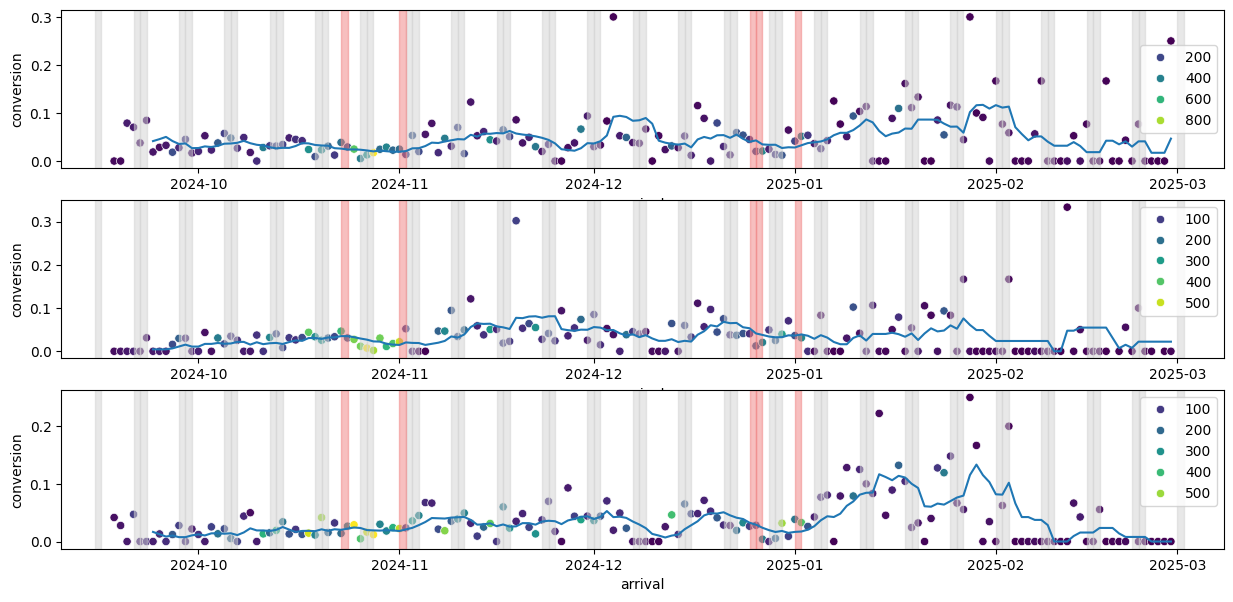

In [912]:
# what factors influences the conversion rate?

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,7))

sns.scatterplot(ax=ax1,
    data=search_and_conversion1[search_and_conversion1['arrival']<'2025-03-01'], 
    x='arrival',
    y='conversion', hue='uuid' ,palette='viridis')
sns.lineplot(ax=ax1,
    data=search_and_conversion1[search_and_conversion1['arrival']<'2025-03-01'], 
    x='arrival',
    y=search_and_conversion1[search_and_conversion1['arrival']<'2025-03-01']['conversion'].rolling(7).mean())

sns.scatterplot(ax=ax2,
    data=search_and_conversion2[search_and_conversion2['arrival']<'2025-03-01'], 
    x='arrival',
    y='conversion', hue='uuid' ,palette='viridis')
sns.lineplot(ax=ax2,
    data=search_and_conversion2[search_and_conversion2['arrival']<'2025-03-01'], 
    x='arrival',
    y=search_and_conversion2[search_and_conversion2['arrival']<'2025-03-01']['conversion'].rolling(7).mean())

sns.scatterplot(ax=ax3,
    data=search_and_conversion3[search_and_conversion3['arrival']<'2025-03-01'], 
    x='arrival',
    y='conversion', hue='uuid' ,palette='viridis')
sns.lineplot(ax=ax3,
    data=search_and_conversion3[search_and_conversion3['arrival']<'2025-03-01'], 
    x='arrival',
    y=search_and_conversion3[search_and_conversion3['arrival']<'2025-03-01']['conversion'].rolling(7).mean())

# Highlight weekends
start_date = pd.to_datetime('2024-09-15')  # Adjust based on your data range
end_date = pd.to_datetime('2025-03-01')
current_date = start_date

while current_date <= end_date:
    if current_date.weekday() >= 5:  # Saturday (5) and Sunday (6)
        ax1.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
        ax2.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
        ax3.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
    current_date += timedelta(days=1)

# Highlight public holidays
for holiday in public_holidays:
    if start_date <= holiday <= end_date:
        ax1.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)
        ax2.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)
        ax3.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)

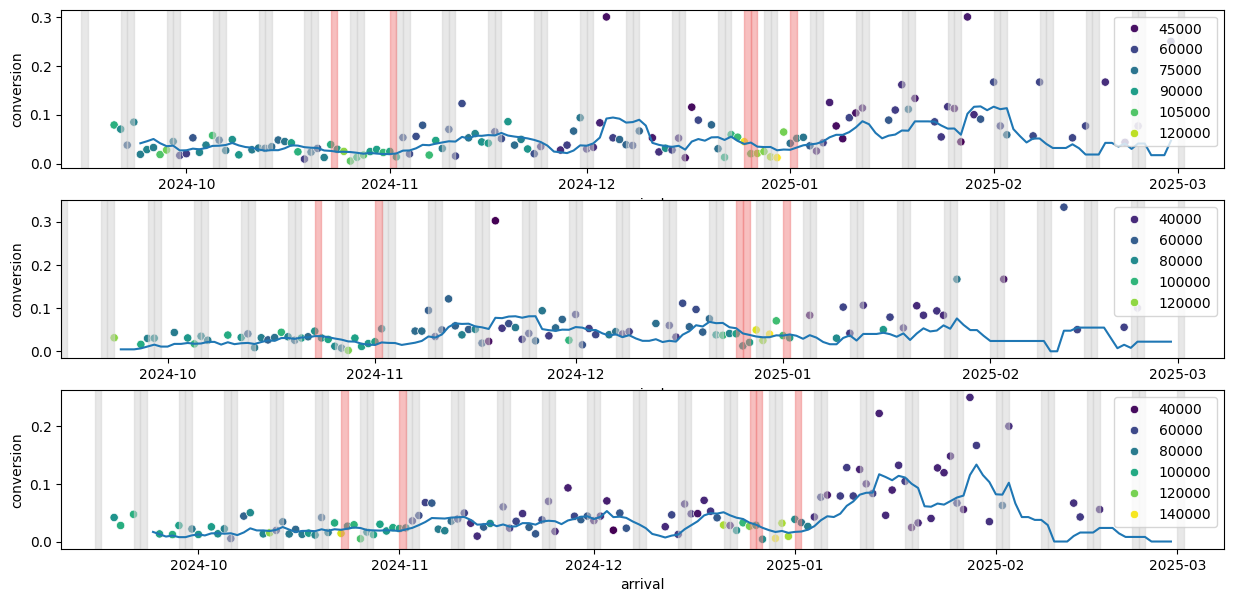

In [913]:
# picked_price_p_night and conversion
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,7))

sns.scatterplot(ax=ax1,
    data=search_and_conversion1[search_and_conversion1['arrival']<'2025-03-01'], 
    x='arrival',
    y='conversion', hue='picked_price_p_night' ,palette='viridis')
sns.lineplot(ax=ax1,
    data=search_and_conversion1[search_and_conversion1['arrival']<'2025-03-01'], 
    x='arrival',
    y=search_and_conversion1[search_and_conversion1['arrival']<'2025-03-01']['conversion'].rolling(7).mean())

sns.scatterplot(ax=ax2,
    data=search_and_conversion2[search_and_conversion2['arrival']<'2025-03-01'], 
    x='arrival',
    y='conversion', hue='picked_price_p_night' ,palette='viridis')
sns.lineplot(ax=ax2,
    data=search_and_conversion2[search_and_conversion2['arrival']<'2025-03-01'], 
    x='arrival',
    y=search_and_conversion2[search_and_conversion2['arrival']<'2025-03-01']['conversion'].rolling(7).mean())

sns.scatterplot(ax=ax3,
    data=search_and_conversion3[search_and_conversion3['arrival']<'2025-03-01'], 
    x='arrival',
    y='conversion', hue='picked_price_p_night' ,palette='viridis')
sns.lineplot(ax=ax3,
    data=search_and_conversion3[search_and_conversion3['arrival']<'2025-03-01'], 
    x='arrival',
    y=search_and_conversion3[search_and_conversion3['arrival']<'2025-03-01']['conversion'].rolling(7).mean())

# Highlight weekends
start_date = pd.to_datetime('2024-09-15')  # Adjust based on your data range
end_date = pd.to_datetime('2025-03-01')
current_date = start_date

while current_date <= end_date:
    if current_date.weekday() >= 5:  # Saturday (5) and Sunday (6)
        ax1.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
        ax2.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
        ax3.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
    current_date += timedelta(days=1)

# Highlight public holidays
for holiday in public_holidays:
    if start_date <= holiday <= end_date:
        ax1.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)
        ax2.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)
        ax3.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)

## Willingness to pay (WTP)

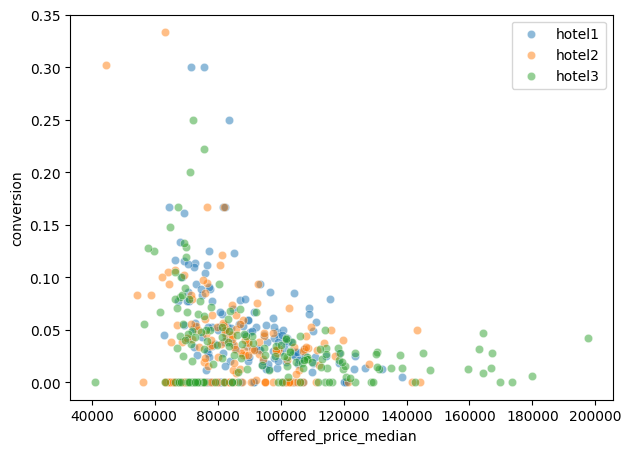

In [914]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,5))
sns.scatterplot(ax=ax1, data=search_and_conversion1[search_and_conversion1['arrival']<'2025-03-01'], x='offered_price_median', y='conversion', label='hotel1', alpha=0.5)
sns.scatterplot(ax=ax1, data=search_and_conversion2[search_and_conversion2['arrival']<'2025-03-01'], x='offered_price_median', y='conversion', label='hotel2', alpha=0.5)
sns.scatterplot(ax=ax1, data=search_and_conversion3[search_and_conversion3['arrival']<'2025-03-01'], x='offered_price_median', y='conversion', label='hotel3', alpha=0.5)
plt.legend()

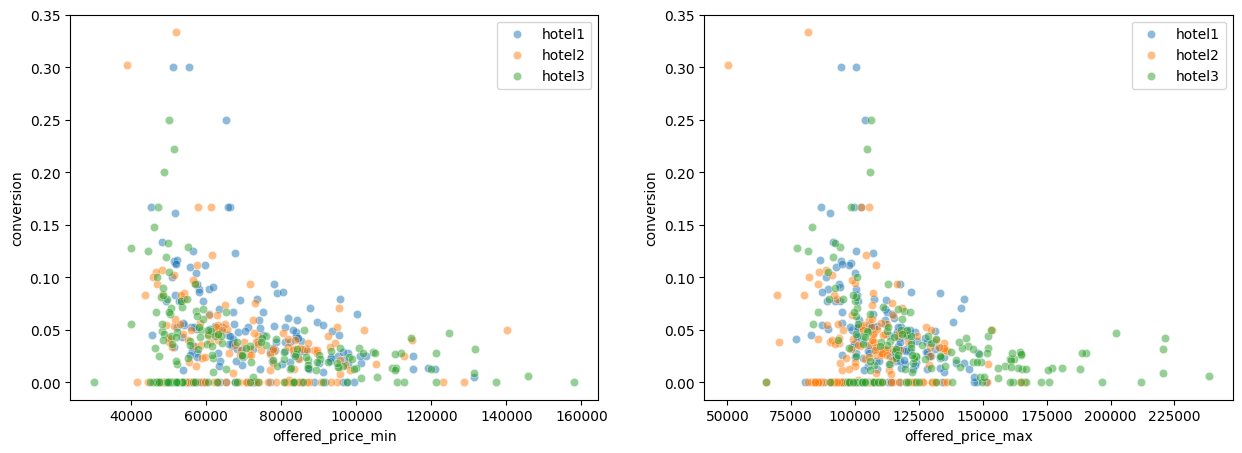

In [915]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(ax=ax1, data=search_and_conversion1[search_and_conversion1['arrival']<'2025-03-01'], x='offered_price_min', y='conversion', label='hotel1', alpha=0.5)
sns.scatterplot(ax=ax1, data=search_and_conversion2[search_and_conversion2['arrival']<'2025-03-01'], x='offered_price_min', y='conversion', label='hotel2', alpha=0.5)
sns.scatterplot(ax=ax1, data=search_and_conversion3[search_and_conversion3['arrival']<'2025-03-01'], x='offered_price_min', y='conversion', label='hotel3', alpha=0.5)
plt.legend()


sns.scatterplot(ax=ax2, data=search_and_conversion1[search_and_conversion1['arrival']<'2025-03-01'], x='offered_price_max', y='conversion', label='hotel1', alpha=0.5)
sns.scatterplot(ax=ax2, data=search_and_conversion2[search_and_conversion2['arrival']<'2025-03-01'], x='offered_price_max', y='conversion', label='hotel2', alpha=0.5)
sns.scatterplot(ax=ax2, data=search_and_conversion3[search_and_conversion3['arrival']<'2025-03-01'], x='offered_price_max', y='conversion', label='hotel3', alpha=0.5)
plt.legend()

<Axes: xlabel='offered_price_median', ylabel='picked_price_p_night'>

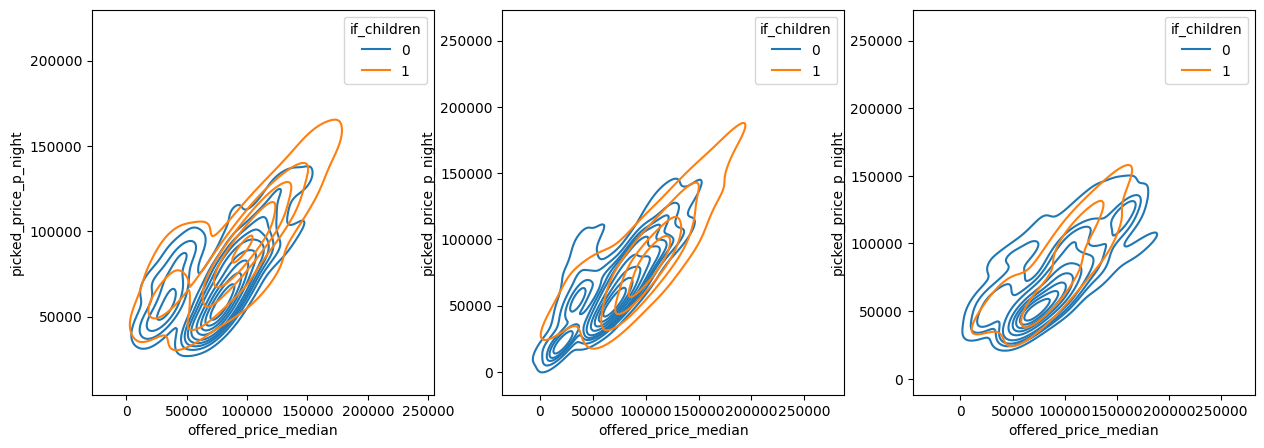

In [916]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.kdeplot(ax=ax1, data=hotel1, x='offered_price_median', y='picked_price_p_night', hue='if_children')
sns.kdeplot(ax=ax2, data=hotel2, x='offered_price_median', y='picked_price_p_night', hue='if_children')
sns.kdeplot(ax=ax3, data=hotel3, x='offered_price_median', y='picked_price_p_night', hue='if_children')

In [917]:
pd.concat([hotel1[hotel1['if_children']==0][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
hotel1[hotel1['if_children']==1][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'] ], axis=1)

# nagyon valószínű, hogy a legolcsóbb ajánlatot választják
# ha van gyerek akkor nő az esélye, hogy drágább szobát választnanak

picked_price_p_night  picked_price_p_night
offered_price_min                 0.754300              0.859784
offered_price_median              0.696808              0.809843
offered_price_max                 0.533794              0.721102
picked_price_p_night              1.000000              1.000000

In [918]:
pd.concat([hotel2[hotel2['if_children']==0][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
hotel2[hotel2['if_children']==1][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'] ], axis=1)

# nagyon valószínű, hogy a legolcsóbb ajánlatot választják
# ha van gyerek akkor jelentősen csökken az esélye, hogy drágább szobát választnanak

picked_price_p_night  picked_price_p_night
offered_price_min                 0.843524              0.921419
offered_price_median              0.802602              0.796035
offered_price_max                 0.676277              0.457341
picked_price_p_night              1.000000              1.000000

In [919]:
pd.concat([hotel3[hotel3['if_children']==0][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
hotel3[hotel3['if_children']==1][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'] ], axis=1)

# nagyon valószínű, hogy a legolcsóbb ajánlatot választják
# ha van gyerek akkor jelentősen csökken az esélye, hogy drágább szobát választnanak

picked_price_p_night  picked_price_p_night
offered_price_min                 0.789204              0.891441
offered_price_median              0.727607              0.823170
offered_price_max                 0.628050              0.545638
picked_price_p_night              1.000000              1.000000

In [920]:
hotel3['utm_medium'].unique()

array(['(not set)', 'organic', 'cpc', 'referral', 'direct', 'ct', 'other',
       'offline', 'email'], dtype=object)

In [921]:
mediums_corr1 = pd.concat(
    [hotel1[hotel1['utm_medium']=='cpc'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['utm_medium']=='referral'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['utm_medium']=='direct'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['utm_medium']=='organic'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['utm_medium']=='ct'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['utm_medium']=='other'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['utm_medium']=='offline'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['utm_medium']=='email'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']], axis=1).set_axis(['cpc', 'referral', 'direct', 'organic', 'ct', 'other', 'offline', 'email'], axis=1).drop(index='picked_price_p_night')

mediums_corr2 = pd.concat(
    [hotel2[hotel2['utm_medium']=='cpc'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['utm_medium']=='referral'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['utm_medium']=='direct'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['utm_medium']=='organic'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['utm_medium']=='ct'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['utm_medium']=='other'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['utm_medium']=='offline'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['utm_medium']=='email'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']], axis=1).set_axis(['cpc', 'referral', 'direct', 'organic', 'ct', 'other', 'offline', 'email'], axis=1).drop(index='picked_price_p_night')

mediums_corr3 = pd.concat(
    [hotel3[hotel3['utm_medium']=='cpc'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['utm_medium']=='referral'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['utm_medium']=='direct'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['utm_medium']=='organic'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['utm_medium']=='ct'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['utm_medium']=='other'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['utm_medium']=='offline'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['utm_medium']=='email'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']], axis=1).set_axis(['cpc', 'referral', 'direct', 'organic', 'ct', 'other', 'offline', 'email'], axis=1).drop(index='picked_price_p_night')

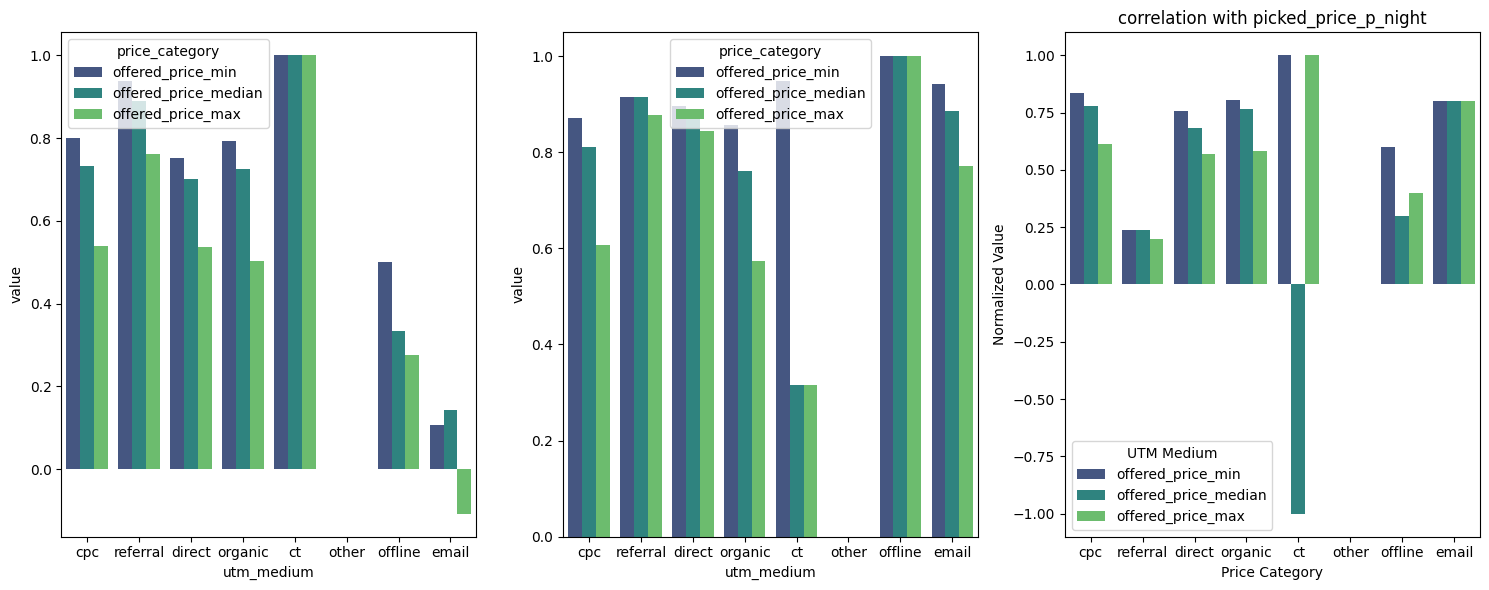

In [922]:
# Convert to tidy format
df_tidy1 = mediums_corr1.reset_index().melt(id_vars="index", var_name="utm_medium", value_name="value")
df_tidy1.rename(columns={"index": "price_category"}, inplace=True)

df_tidy2 = mediums_corr2.reset_index().melt(id_vars="index", var_name="utm_medium", value_name="value")
df_tidy2.rename(columns={"index": "price_category"}, inplace=True)

df_tidy3 = mediums_corr3.reset_index().melt(id_vars="index", var_name="utm_medium", value_name="value")
df_tidy3.rename(columns={"index": "price_category"}, inplace=True)

# Create a categorical barplot
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 6))
sns.barplot(ax=ax1, data=df_tidy1, hue="price_category", y="value", x="utm_medium", palette="viridis")
sns.barplot(ax=ax2, data=df_tidy2, hue="price_category", y="value", x="utm_medium", palette="viridis")
sns.barplot(ax=ax3, data=df_tidy3, hue="price_category", y="value", x="utm_medium", palette="viridis")
plt.title("correlation with picked_price_p_night")
plt.ylabel("Normalized Value")
plt.xlabel("Price Category")
plt.legend(title="UTM Medium")
plt.tight_layout()

In [924]:
source_corr = pd.concat(
    [hotel1[hotel1['utm_source']=='facebook'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['utm_source']=='google'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['utm_source']=='other'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['utm_source']=='bing'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['utm_source']=='instagram'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']], axis=1).set_axis(['facebook', 'google', 'other', 'bing', 'instagram'], axis=1).drop(index='picked_price_p_night')

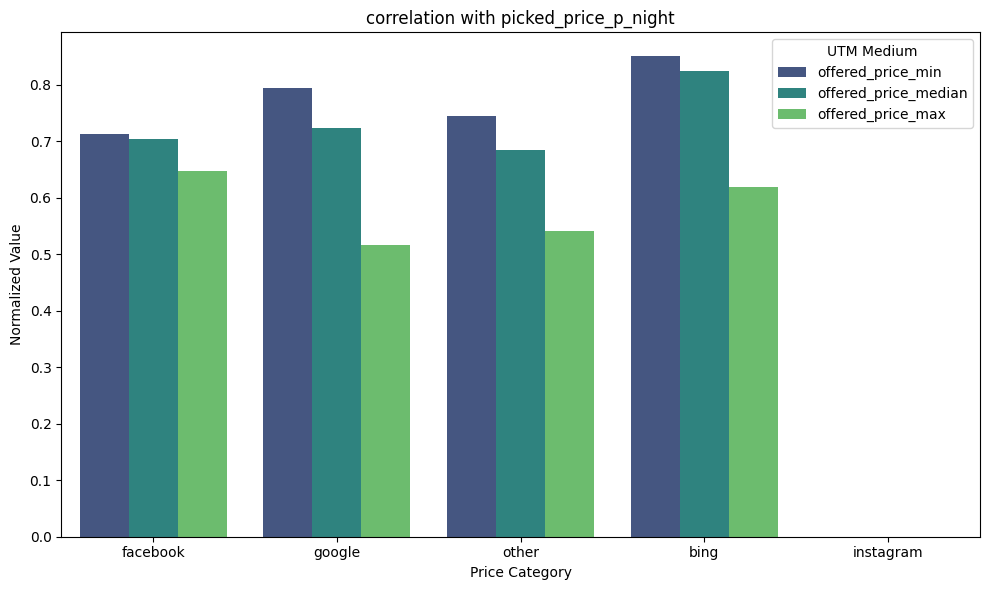

In [925]:
# Convert to tidy format
df_tidy = source_corr.reset_index().melt(id_vars="index", var_name="utm_source", value_name="value")
df_tidy.rename(columns={"index": "price_category"}, inplace=True)

# Create a categorical barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_tidy,
    hue="price_category",
    y="value",
    x="utm_source",
    palette="viridis",
)
plt.title("correlation with picked_price_p_night")
plt.ylabel("Normalized Value")
plt.xlabel("Price Category")
plt.legend(title="UTM Medium")
plt.tight_layout()

<Axes: ylabel='Frequency'>

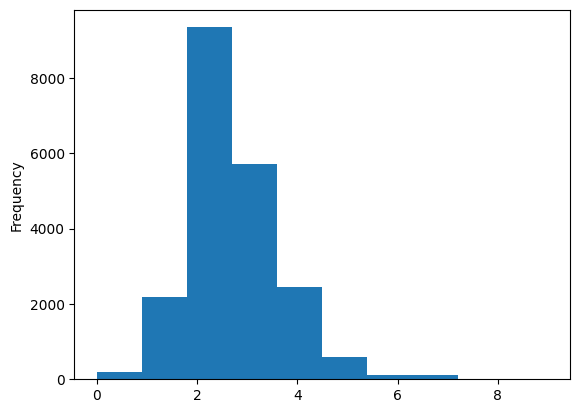

In [926]:
hotel1['nights'].plot(kind='hist')

In [927]:
nights_corr1 = pd.concat(
    [hotel1[hotel1['nights']==1][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['nights']==2][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['nights']==3][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['nights']==4][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['nights']==5][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['nights']==6][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['nights']==7][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['nights']==8][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']],
     axis=1).set_axis(['1', '2', '3', '4', '5', '6', '7', '8'], axis=1).drop(index='picked_price_p_night')

nights_corr2 = pd.concat(
    [hotel2[hotel2['nights']==1][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['nights']==2][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['nights']==3][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['nights']==4][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['nights']==5][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['nights']==6][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['nights']==7][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['nights']==8][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']],
     axis=1).set_axis(['1', '2', '3', '4', '5', '6', '7', '8'], axis=1).drop(index='picked_price_p_night')

nights_corr3 = pd.concat(
    [hotel3[hotel3['nights']==1][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['nights']==2][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['nights']==3][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['nights']==4][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['nights']==5][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['nights']==6][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['nights']==7][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['nights']==8][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']],
     axis=1).set_axis(['1', '2', '3', '4', '5', '6', '7', '8'], axis=1).drop(index='picked_price_p_night')

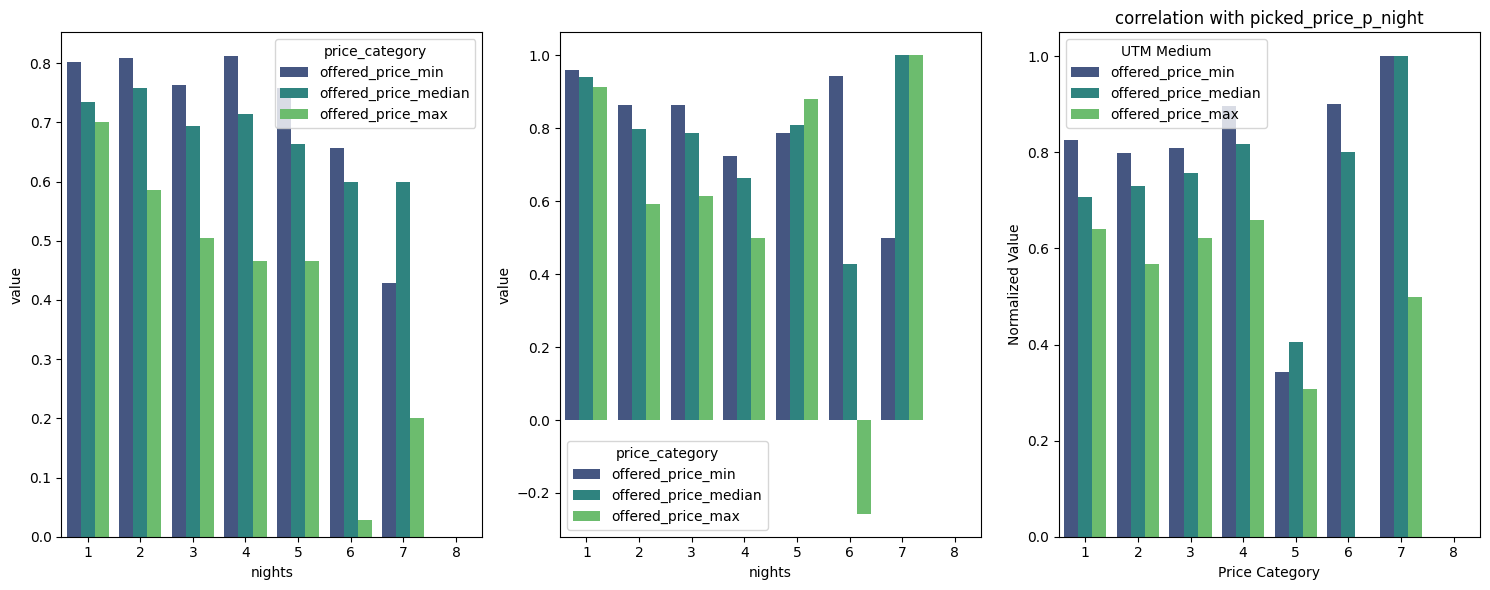

In [928]:
# Convert to tidy format
df_tidy1 = nights_corr1.reset_index().melt(id_vars="index", var_name="nights", value_name="value")
df_tidy1.rename(columns={"index": "price_category"}, inplace=True)

df_tidy2 = nights_corr2.reset_index().melt(id_vars="index", var_name="nights", value_name="value")
df_tidy2.rename(columns={"index": "price_category"}, inplace=True)

df_tidy3 = nights_corr3.reset_index().melt(id_vars="index", var_name="nights", value_name="value")
df_tidy3.rename(columns={"index": "price_category"}, inplace=True)

# Create a categorical barplot
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 6))
sns.barplot(ax=ax1, data=df_tidy1, hue="price_category", y="value", x="nights", palette="viridis")
sns.barplot(ax=ax2, data=df_tidy2, hue="price_category", y="value", x="nights", palette="viridis")
sns.barplot(ax=ax3, data=df_tidy3, hue="price_category", y="value", x="nights", palette="viridis")
plt.title("correlation with picked_price_p_night")
plt.ylabel("Normalized Value")
plt.xlabel("Price Category")
plt.legend(title="UTM Medium")
plt.tight_layout()

In [929]:
children_corr = pd.concat(
    [hotel1[hotel1['children']==0][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['children']==1][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['children']==2][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['children']==3][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['children']==4][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['children']==5][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']],
     axis=1).set_axis(['0','1', '2', '3', '4', '5'], axis=1).drop(index='picked_price_p_night')

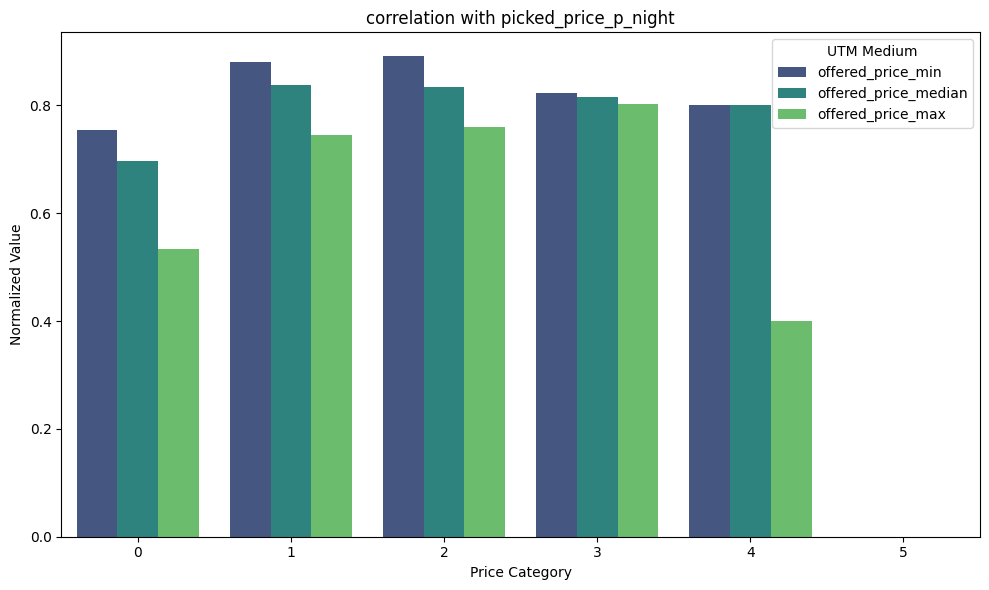

In [930]:
# Convert to tidy format
df_tidy = children_corr.reset_index().melt(id_vars="index", var_name="children", value_name="value")
df_tidy.rename(columns={"index": "price_category"}, inplace=True)

# Create a categorical barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_tidy,
    hue="price_category",
    y="value",
    x="children",
    palette="viridis",
)
plt.title("correlation with picked_price_p_night")
plt.ylabel("Normalized Value")
plt.xlabel("Price Category")
plt.legend(title="UTM Medium")
plt.tight_layout()

In [931]:
if_children_corr = pd.concat(
    [hotel1[hotel1['if_children']==0][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['if_children']==1][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']],
     axis=1).set_axis(['0','1'], axis=1).drop(index='picked_price_p_night')

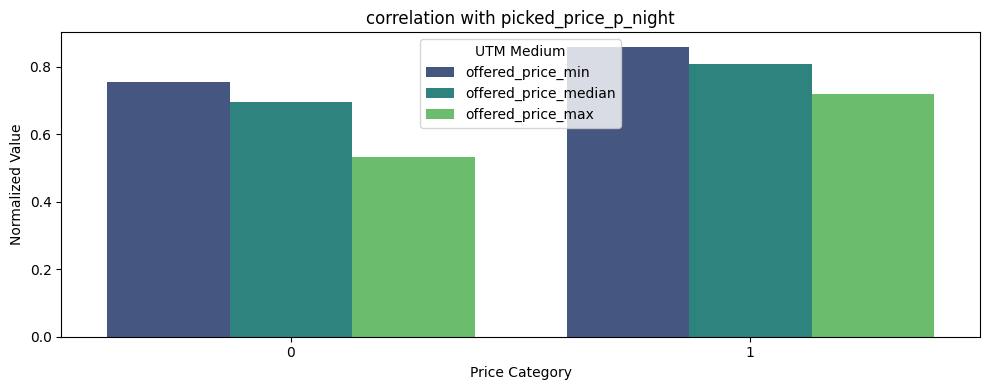

In [932]:
# Convert to tidy format
df_tidy = if_children_corr.reset_index().melt(id_vars="index", var_name="if_children", value_name="value")
df_tidy.rename(columns={"index": "price_category"}, inplace=True)

# Create a categorical barplot
plt.figure(figsize=(10, 4))
sns.barplot(
    data=df_tidy,
    hue="price_category",
    y="value",
    x="if_children",
    palette="viridis",
)
plt.title("correlation with picked_price_p_night")
plt.ylabel("Normalized Value")
plt.xlabel("Price Category")
plt.legend(title="UTM Medium")
plt.tight_layout()

<Axes: ylabel='Frequency'>

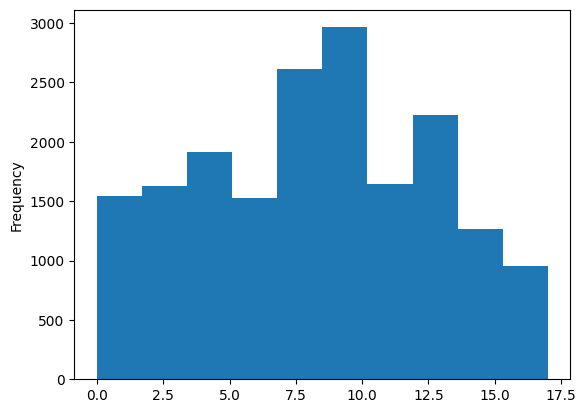

In [933]:
df['children_age_mean'].plot(kind='hist')

In [934]:
children_age_corr1 = pd.concat(
    [hotel1[hotel1['children_age_mean']<=7][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[(hotel1['children_age_mean']>7) & (hotel1['children_age_mean']<=12)][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['children_age_mean']>12][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']],
     axis=1).set_axis(['<=7','7-12','>12'], axis=1).drop(index='picked_price_p_night')

children_age_corr2 = pd.concat(
    [hotel2[hotel2['children_age_mean']<=7][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[(hotel2['children_age_mean']>7) & (hotel2['children_age_mean']<=12)][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['children_age_mean']>12][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']],
     axis=1).set_axis(['<=7','7-12','>12'], axis=1).drop(index='picked_price_p_night')

children_age_corr3 = pd.concat(
    [hotel3[hotel3['children_age_mean']<=7][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[(hotel3['children_age_mean']>7) & (hotel3['children_age_mean']<=12)][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['children_age_mean']>12][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']],
     axis=1).set_axis(['<=7','7-12','>12'], axis=1).drop(index='picked_price_p_night')

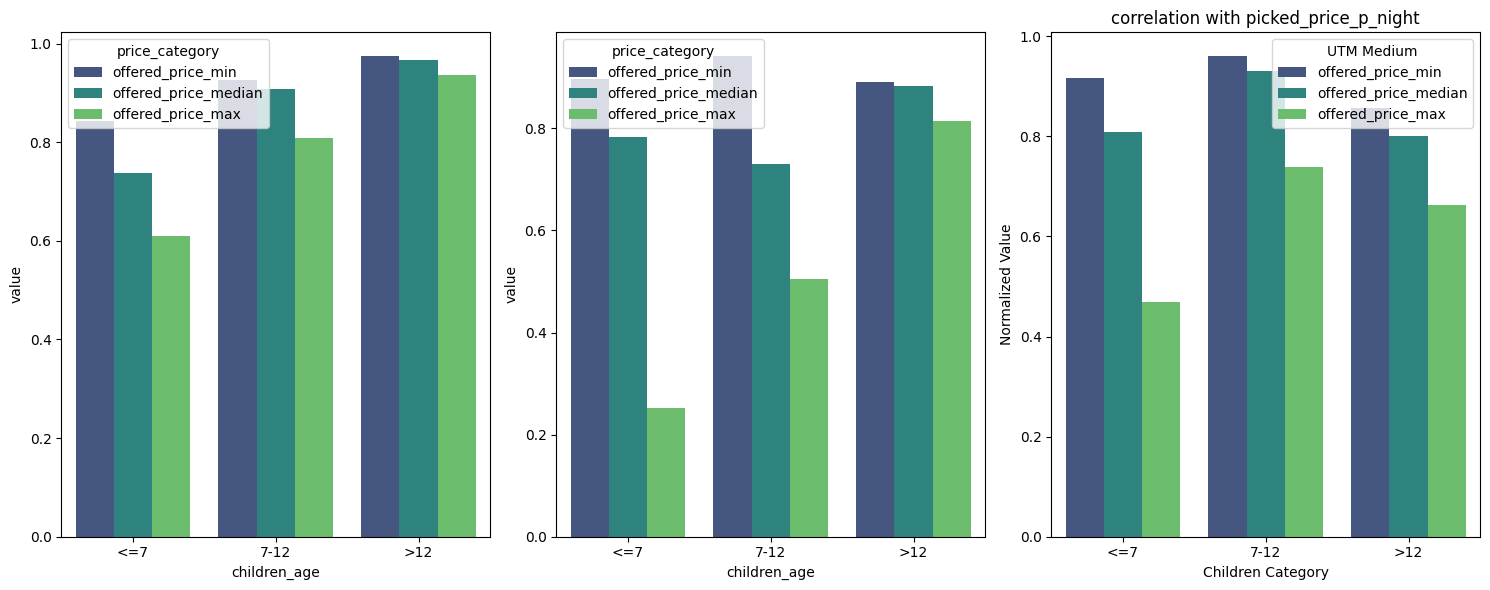

In [935]:
# Convert to tidy format
df_tidy1 = children_age_corr1.reset_index().melt(id_vars="index", var_name="children_age", value_name="value")
df_tidy1.rename(columns={"index": "price_category"}, inplace=True)

df_tidy2 = children_age_corr2.reset_index().melt(id_vars="index", var_name="children_age", value_name="value")
df_tidy2.rename(columns={"index": "price_category"}, inplace=True)

df_tidy3 = children_age_corr3.reset_index().melt(id_vars="index", var_name="children_age", value_name="value")
df_tidy3.rename(columns={"index": "price_category"}, inplace=True)

# Create a categorical barplot
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 6))
sns.barplot(ax=ax1, data=df_tidy1, hue="price_category", y="value", x="children_age", palette="viridis")
sns.barplot(ax=ax2, data=df_tidy2, hue="price_category", y="value", x="children_age", palette="viridis")
sns.barplot(ax=ax3, data=df_tidy3, hue="price_category", y="value", x="children_age", palette="viridis")
plt.title("correlation with picked_price_p_night")
plt.ylabel("Normalized Value")
plt.xlabel("Children Category")
plt.legend(title="UTM Medium")
plt.tight_layout()

In [936]:
lead_time_corr1 = pd.concat(
    [hotel1[hotel1['lead_time_category']=='last_minute'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['lead_time_category']=='short_term'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['lead_time_category']=='medium_term'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel1[hotel1['lead_time_category']=='long_term'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']],
     axis=1).set_axis(['last_minute','short_term','medium_term','long_term'], axis=1).drop(index='picked_price_p_night')

lead_time_corr2 = pd.concat(
    [hotel2[hotel2['lead_time_category']=='last_minute'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['lead_time_category']=='short_term'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['lead_time_category']=='medium_term'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel2[hotel2['lead_time_category']=='long_term'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']],
     axis=1).set_axis(['last_minute','short_term','medium_term','long_term'], axis=1).drop(index='picked_price_p_night')

lead_time_corr3 = pd.concat(
    [hotel3[hotel3['lead_time_category']=='last_minute'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['lead_time_category']=='short_term'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['lead_time_category']=='medium_term'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night'],
     hotel3[hotel3['lead_time_category']=='long_term'][['offered_price_min','offered_price_median','offered_price_max','picked_price_p_night']].corr(method='spearman')['picked_price_p_night']],
     axis=1).set_axis(['last_minute','short_term','medium_term','long_term'], axis=1).drop(index='picked_price_p_night')

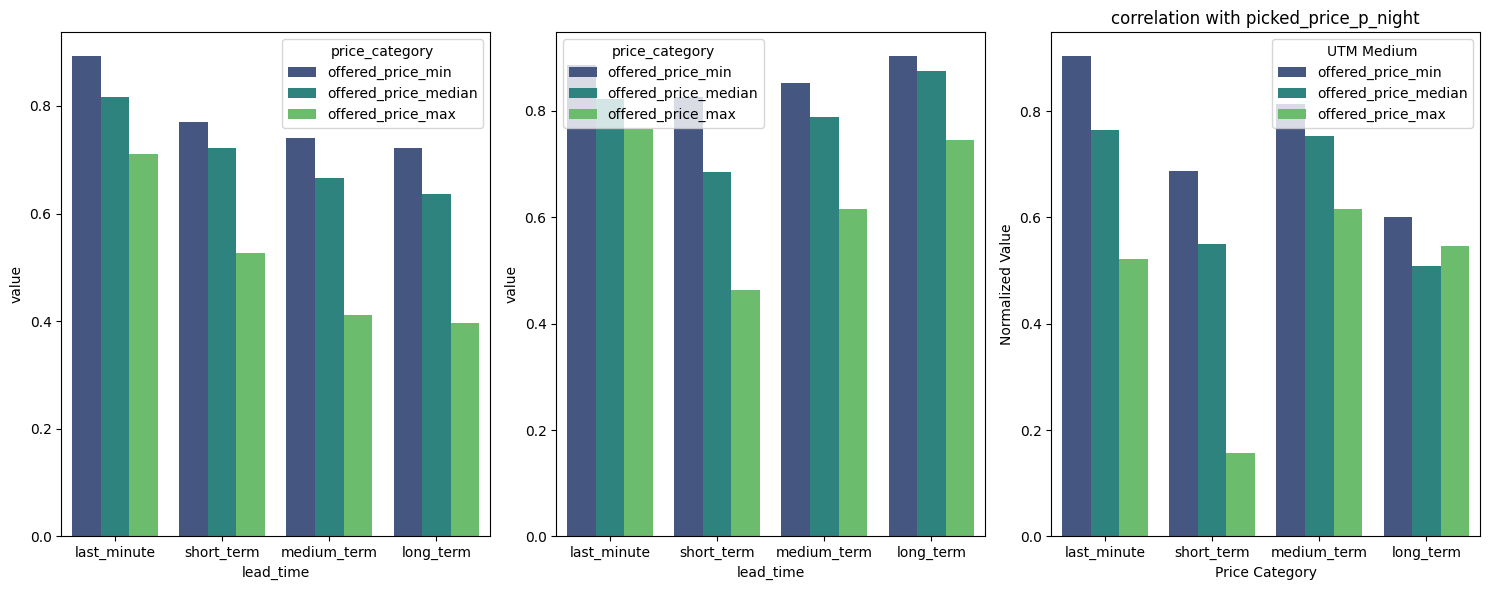

In [937]:
# Convert to tidy format
df_tidy1 = lead_time_corr1.reset_index().melt(id_vars="index", var_name="lead_time", value_name="value")
df_tidy1.rename(columns={"index": "price_category"}, inplace=True)

df_tidy2 = lead_time_corr2.reset_index().melt(id_vars="index", var_name="lead_time", value_name="value")
df_tidy2.rename(columns={"index": "price_category"}, inplace=True)

df_tidy3 = lead_time_corr3.reset_index().melt(id_vars="index", var_name="lead_time", value_name="value")
df_tidy3.rename(columns={"index": "price_category"}, inplace=True)

# Create a categorical barplot
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 6))
sns.barplot(ax=ax1, data=df_tidy1, hue="price_category", y="value", x="lead_time", palette="viridis")
sns.barplot(ax=ax2, data=df_tidy2, hue="price_category", y="value", x="lead_time", palette="viridis")
sns.barplot(ax=ax3, data=df_tidy3, hue="price_category", y="value", x="lead_time", palette="viridis")
plt.title("correlation with picked_price_p_night")
plt.ylabel("Normalized Value")
plt.xlabel("Price Category")
plt.legend(title="UTM Medium")
plt.tight_layout()

In [938]:
df.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'picked_price_median', 'picked_price_p_night', 'picked_room',
       'baby_bed', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_discount_total', 'redeemed_loyalty_points_total', 'hotel_id',
       'rfm_monetary_score', 'rfm_duration_score', '0_age', '1_age', '2_age',
       '3_age', '4_age', 'ROOMAA_room_price_min', 'offered_price_median',
       'offered_price_min', 'offered_price_max', 'ROOMAA_room_price_max',
       'ROOMBB_room_price_min', 'ROOMBB_room_price_max',
       'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
       'ROOMDD_room_price_min', 'ROOMDD_room

In [939]:
# willingness to pay - wtp
wtp = df[['hotel_id','arrival','picked_price_p_night','upsell_total_price']].groupby(by=['hotel_id','arrival']).median().reset_index().dropna()
wtp

hotel_id    arrival  picked_price_p_night  upsell_total_price
2    hotel_1 2024-09-20          87975.000000                 0.0
3    hotel_1 2024-09-21          86935.550000                 0.0
4    hotel_1 2024-09-22          67104.000000                 0.0
5    hotel_1 2024-09-23          71533.890000                 0.0
6    hotel_1 2024-09-24          78922.241933                 0.0
..       ...        ...                   ...                 ...
744  hotel_3 2025-02-14          54977.915000                 0.0
747  hotel_3 2025-02-17          49914.480000                 0.0
812  hotel_3 2025-05-24          53346.000000                 0.0
833  hotel_3 2025-06-22          82473.358000                 0.0
881  hotel_3 2025-08-31          70244.688000                 0.0

[390 rows x 4 columns]

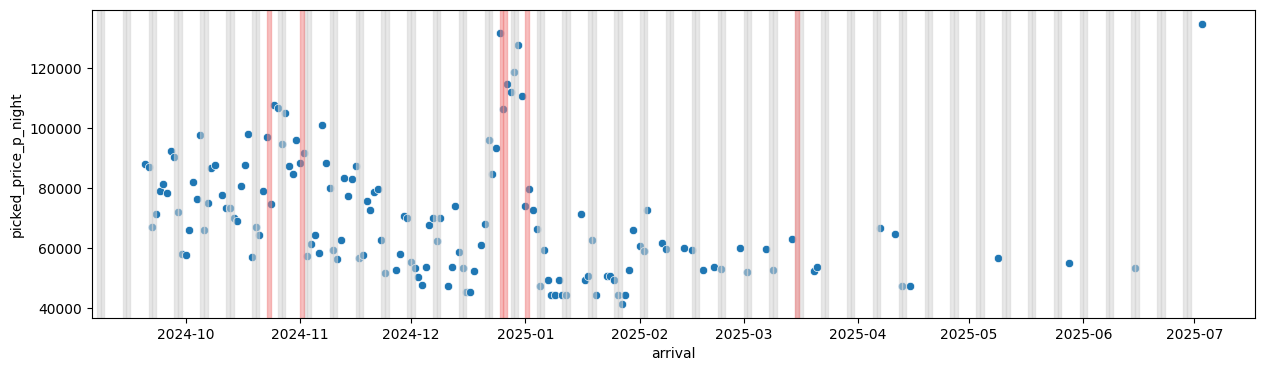

In [940]:
# mean room price as function of the date
fig, ax1 = plt.subplots(1,1, figsize=(15,4))
sns.scatterplot(ax=ax1, data=wtp[wtp['hotel_id']=='hotel_1'], x='arrival', y='picked_price_p_night' )

# Highlight weekends
start_date = pd.to_datetime('2024-09-01')  # Adjust based on your data range
end_date = pd.to_datetime('2025-07-01')
current_date = start_date

while current_date <= end_date:
    if current_date.weekday() >= 5:  # Saturday (5) and Sunday (6)
        ax1.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
    current_date += timedelta(days=1)

# Highlight public holidays
for holiday in public_holidays:
    if start_date <= holiday <= end_date:
        ax1.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)

<Axes: ylabel='Frequency'>

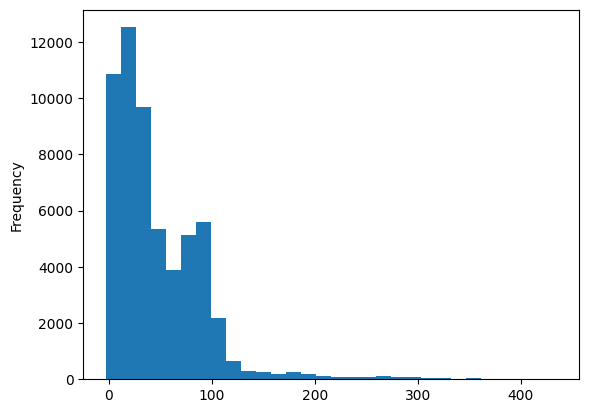

In [941]:
df['lead_time'].plot(kind='hist', bins=30)

<Axes: xlabel='lead_time'>

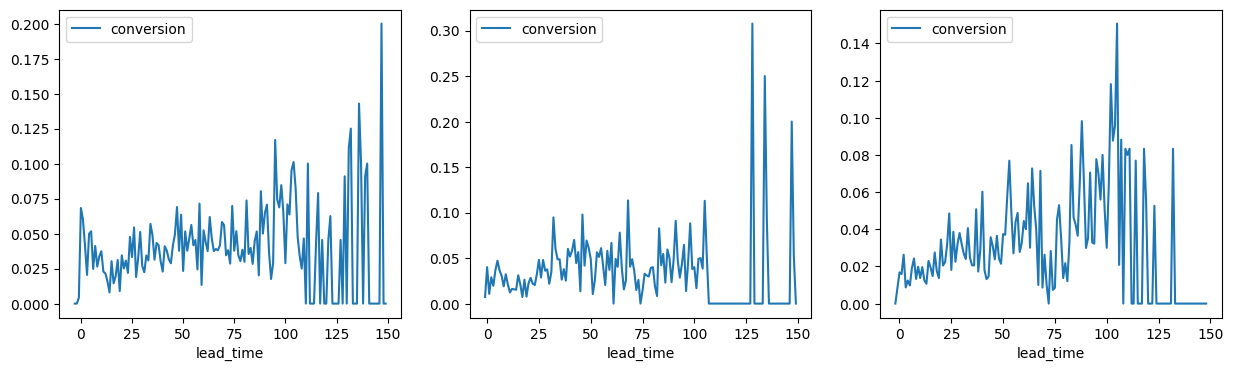

In [942]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
hotel1[hotel1['lead_time']<150][['lead_time','conversion']].groupby(by='lead_time').mean().plot(ax=ax1)
hotel2[hotel2['lead_time']<150][['lead_time','conversion']].groupby(by='lead_time').mean().plot(ax=ax2)
hotel3[hotel3['lead_time']<150][['lead_time','conversion']].groupby(by='lead_time').mean().plot(ax=ax3)

In [943]:
df[['hotel_id','conversion','rfm_duration_score']].groupby(by=['hotel_id','rfm_duration_score']).mean()

conversion
hotel_id rfm_duration_score            
hotel_1  1                     0.039979
         2-3                   0.035649
         4-9                   0.048000
hotel_2  1                     0.038440
         2-3                   0.034095
         4-9                   0.034623
hotel_3  1                     0.031059
         2-3                   0.030881
         4-9                   0.029630

In [944]:
# read occupancy data
occupancy = pd.read_csv('./../data-workfile/daily_occupancy.csv', index_col='Unnamed: 0')

In [945]:
occupancy[occupancy['hotel_id']=='hotel_1']

recording_date subject_date  fill_rate hotel_id  days_until_stay  \
0         2024-09-18   2024-09-18     67.368  hotel_1                0   
1         2024-09-18   2024-09-19     65.789  hotel_1                1   
2         2024-09-18   2024-09-20     67.895  hotel_1                2   
3         2024-09-18   2024-09-21     59.474  hotel_1                3   
4         2024-09-18   2024-09-22     43.684  hotel_1                4   
...              ...          ...        ...      ...              ...   
10783     2024-10-18   2025-08-27      0.526  hotel_1              313   
10784     2024-10-18   2025-08-28      0.526  hotel_1              314   
10785     2024-10-18   2025-08-29      0.526  hotel_1              315   
10786     2024-10-18   2025-08-30      0.526  hotel_1              316   
10787     2024-10-18   2025-08-31      0.526  hotel_1              317   

       stay_day_of_week  subject_day_of_week  subject_is_weekend  
0                     2                    2                   0  
1                     3                    3                   0  
2                     4                    4                   0  
3                     5                    5                   1  
4                     6                    6                   1  
...                 ...                  ...                 ...  
10783                 2                    2                   0  
10784                 3                    3                   0  
10785                 4                    4                   0  
10786                 5                    5                   1  
10787                 6                    6                   1  

[10788 rows x 8 columns]

<Axes: >

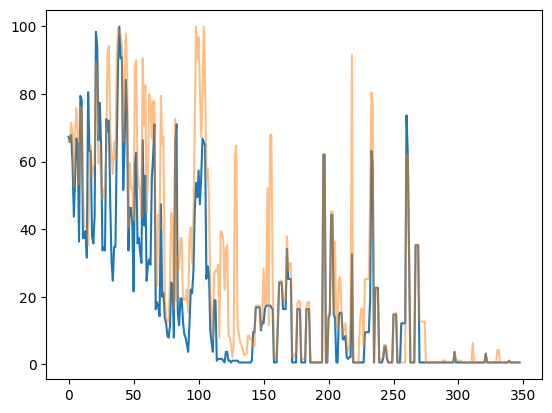

In [946]:
occupancy[(occupancy['hotel_id']=='hotel_1') & (occupancy['recording_date']=='2024-09-18')]['fill_rate'].plot()
occupancy[(occupancy['hotel_id']=='hotel_1') & (occupancy['recording_date']=='2024-10-18')]['fill_rate'].reset_index(drop=True).plot(alpha=0.5)

In [947]:
# mean occupancy for the subject date:

occupancy_hotel_1 = occupancy[occupancy['hotel_id']=='hotel_1'][['subject_date','fill_rate','days_until_stay']].groupby(by='subject_date').mean().reset_index().join(
    hotel1[['lead_time','conversion']].groupby(by='lead_time').mean(), on='days_until_stay', how='inner')
occupancy_hotel_2 = occupancy[occupancy['hotel_id']=='hotel_2'][['subject_date','fill_rate','days_until_stay']].groupby(by='subject_date').mean().reset_index().join(
    hotel2[['lead_time','conversion']].groupby(by='lead_time').mean(), on='days_until_stay', how='inner')
occupancy_hotel_3 = occupancy[occupancy['hotel_id']=='hotel_3'][['subject_date','fill_rate','days_until_stay']].groupby(by='subject_date').mean().reset_index().join(
    hotel3[['lead_time','conversion']].groupby(by='lead_time').mean(), on='days_until_stay', how='inner')

<Axes: xlabel='days_until_stay', ylabel='conversion'>

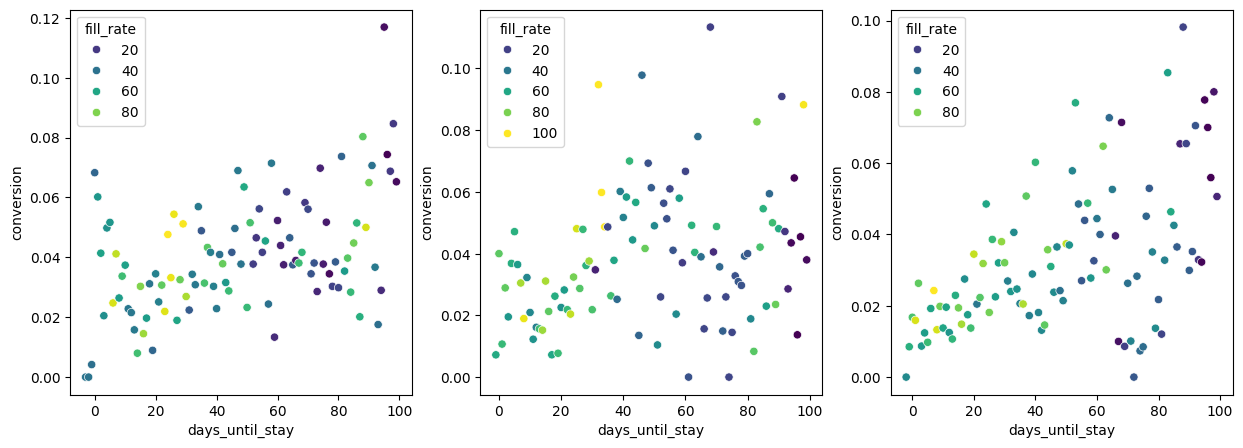

In [948]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(ax=ax1, data=occupancy_hotel_1[(occupancy_hotel_1['conversion']<0.2) & (occupancy_hotel_1['days_until_stay']<100)], x='days_until_stay', y='conversion', hue='fill_rate', palette='viridis')
sns.scatterplot(ax=ax2, data=occupancy_hotel_2[(occupancy_hotel_2['conversion']<0.2) & (occupancy_hotel_2['days_until_stay']<100)], x='days_until_stay', y='conversion', hue='fill_rate', palette='viridis')
sns.scatterplot(ax=ax3, data=occupancy_hotel_3[(occupancy_hotel_3['conversion']<0.2) & (occupancy_hotel_3['days_until_stay']<100)], x='days_until_stay', y='conversion', hue='fill_rate', palette='viridis')

In [949]:
##### kovetkeztetes: lead time novekedesevel a konverzio es szabad helyek szama is novekszik, nem tudni ok-okozatot????

In [950]:
occupancy_hotel_1

subject_date  fill_rate  days_until_stay  conversion
12    2024-09-30  40.917032             -3.0    0.000000
13    2024-10-01  40.899677             -2.0    0.000000
14    2024-10-02  39.049290             -1.0    0.004172
15    2024-10-03  35.415968              0.0    0.068259
16    2024-10-04  54.125452              1.0    0.060172
..           ...        ...              ...         ...
331   2025-08-15   2.427935            316.0    0.000000
334   2025-08-18   0.526000            319.0    0.000000
337   2025-08-21   0.526000            322.0    0.000000
339   2025-08-23   1.053000            324.0    0.000000
343   2025-08-27   0.526000            328.0    0.000000

[284 rows x 4 columns]

(-0.05, 0.3)

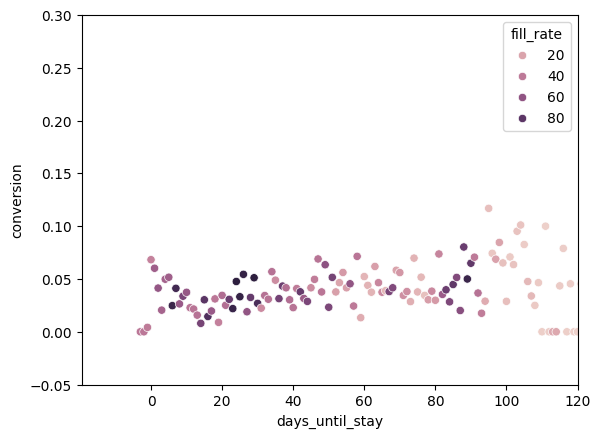

In [951]:
# - konverziós arányokat az adott dátumra (ezeket groupby alapjan összevonassal)
# + ezt összevetni a foglaltsági számokkal
#fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,4))
#sns.scatterplot(ax=ax1, data=occupancy_hotel_1, x='days_until_stay', y='fill_rate', )
sns.scatterplot(data=occupancy_hotel_1, x='days_until_stay', y='conversion', hue='fill_rate')
plt.xlim(right=120)
plt.ylim(top=0.3)

In [952]:
hotel1[hotel1['arrival']<'2025-03-01'][['arrival','offered_price_min']].groupby(by='arrival').min().reset_index()

arrival  offered_price_min
0   2024-09-18         20216.5875
1   2024-09-19         36819.5000
2   2024-09-20         22080.0000
3   2024-09-21         52785.0000
4   2024-09-22         42956.0000
..         ...                ...
159 2025-02-24         52240.0000
160 2025-02-25         84297.0000
161 2025-02-26         52384.2000
162 2025-02-27         53856.0000
163 2025-02-28         53856.0000

[164 rows x 2 columns]

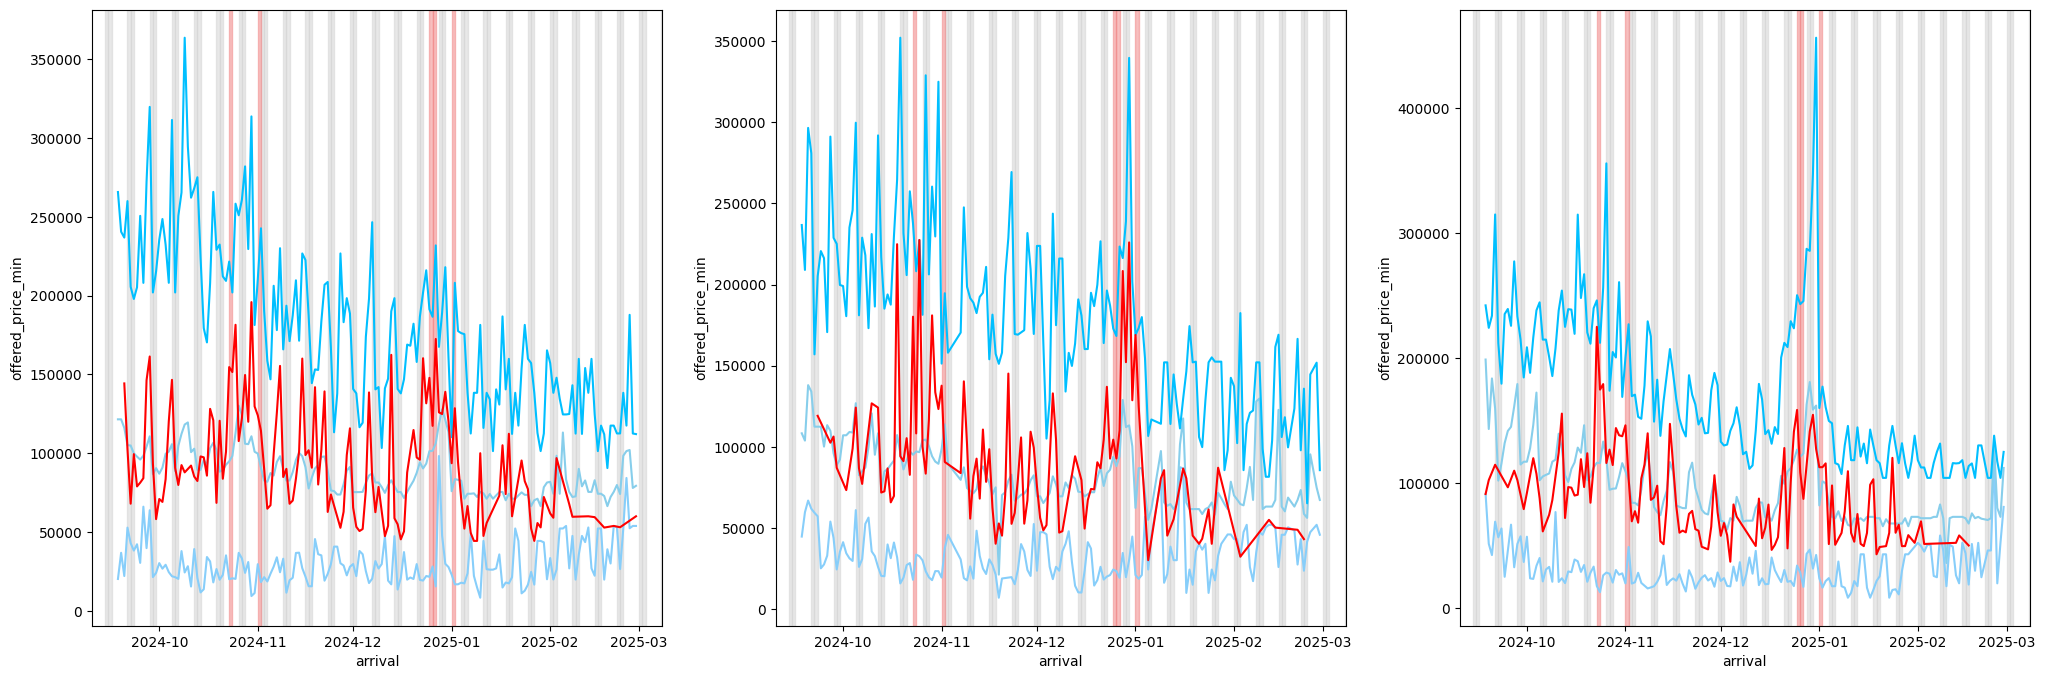

In [953]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(25,8))

sns.lineplot(ax=ax1, data=hotel1[hotel1['arrival']<'2025-03-01'][['arrival','offered_price_min']].groupby(by='arrival').min().reset_index(), x='arrival', y='offered_price_min', ci=None, color='lightskyblue')
sns.lineplot(ax=ax1, data=hotel1[hotel1['arrival']<'2025-03-01'][['arrival','offered_price_median']].groupby(by='arrival').median().reset_index(), x='arrival', y='offered_price_median', ci=None, color='skyblue')
sns.lineplot(ax=ax1, data=hotel1[hotel1['arrival']<'2025-03-01'][['arrival','offered_price_max']].groupby(by='arrival').max().reset_index(), x='arrival', y='offered_price_max', ci=None, color='deepskyblue')
sns.lineplot(ax=ax1, data=hotel1[hotel1['arrival']<'2025-03-01'][['arrival','picked_price_p_night']].groupby(by='arrival').max().reset_index(), x='arrival', y='picked_price_p_night', ci=None, color='red')

sns.lineplot(ax=ax2, data=hotel2[hotel2['arrival']<'2025-03-01'][['arrival','offered_price_min']].groupby(by='arrival').min().reset_index(), x='arrival', y='offered_price_min', ci=None, color='lightskyblue')
sns.lineplot(ax=ax2, data=hotel2[hotel2['arrival']<'2025-03-01'][['arrival','offered_price_median']].groupby(by='arrival').median().reset_index(), x='arrival', y='offered_price_median', ci=None, color='skyblue')
sns.lineplot(ax=ax2, data=hotel2[hotel2['arrival']<'2025-03-01'][['arrival','offered_price_max']].groupby(by='arrival').max().reset_index(), x='arrival', y='offered_price_max', ci=None, color='deepskyblue')
sns.lineplot(ax=ax2, data=hotel2[hotel2['arrival']<'2025-03-01'][['arrival','picked_price_p_night']].groupby(by='arrival').max().reset_index(), x='arrival', y='picked_price_p_night', ci=None, color='red')

sns.lineplot(ax=ax3, data=hotel3[hotel3['arrival']<'2025-03-01'][['arrival','offered_price_min']].groupby(by='arrival').min().reset_index(), x='arrival', y='offered_price_min', ci=None, color='lightskyblue')
sns.lineplot(ax=ax3, data=hotel3[hotel3['arrival']<'2025-03-01'][['arrival','offered_price_median']].groupby(by='arrival').median().reset_index(), x='arrival', y='offered_price_median', ci=None, color='skyblue')
sns.lineplot(ax=ax3, data=hotel3[hotel3['arrival']<'2025-03-01'][['arrival','offered_price_max']].groupby(by='arrival').max().reset_index(), x='arrival', y='offered_price_max', ci=None, color='deepskyblue')
sns.lineplot(ax=ax3, data=hotel3[hotel3['arrival']<'2025-03-01'][['arrival','picked_price_p_night']].groupby(by='arrival').max().reset_index(), x='arrival', y='picked_price_p_night', ci=None, color='red')

# Highlight weekends
start_date = pd.to_datetime('2024-09-01')  # Adjust based on your data range
end_date = pd.to_datetime('2025-07-01')
current_date = start_date

while current_date <= end_date:
    if current_date.weekday() >= 5:  # Saturday (5) and Sunday (6)
        ax1.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
        ax2.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
        ax3.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
    current_date += timedelta(days=1)

# Highlight public holidays
for holiday in public_holidays:
    if start_date <= holiday <= end_date:
        ax1.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)
        ax2.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)
        ax3.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)

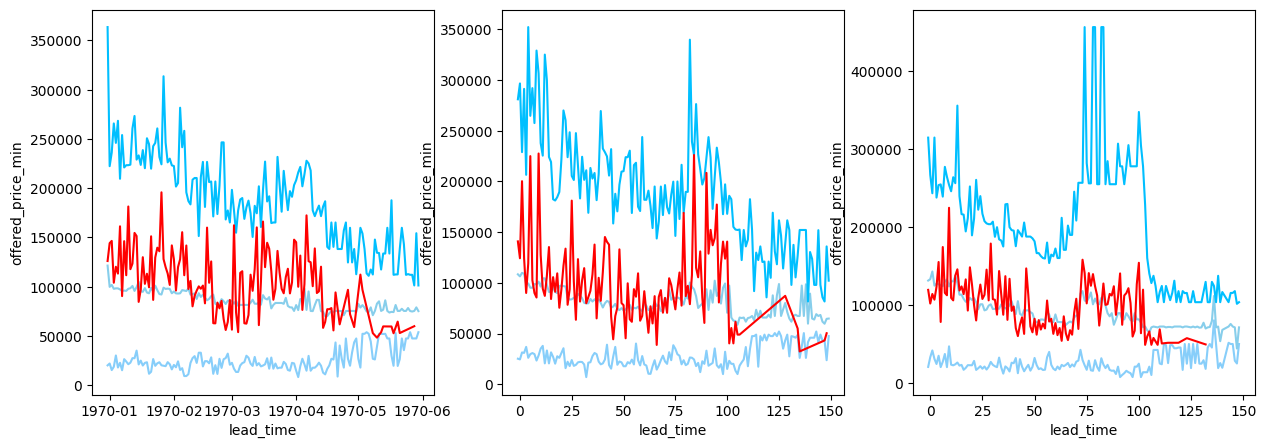

In [954]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

sns.lineplot(ax=ax1, data=hotel1[hotel1['lead_time']<150][['lead_time','offered_price_min']].groupby(by='lead_time').min().reset_index(), x='lead_time', y='offered_price_min', ci=None, color='lightskyblue')
sns.lineplot(ax=ax1, data=hotel1[hotel1['lead_time']<150][['lead_time','offered_price_median']].groupby(by='lead_time').median().reset_index(), x='lead_time', y='offered_price_median', ci=None, color='skyblue')
sns.lineplot(ax=ax1, data=hotel1[hotel1['lead_time']<150][['lead_time','offered_price_max']].groupby(by='lead_time').max().reset_index(), x='lead_time', y='offered_price_max', ci=None, color='deepskyblue')
sns.lineplot(ax=ax1, data=hotel1[hotel1['lead_time']<150][['lead_time','picked_price_p_night']].groupby(by='lead_time').max().reset_index(), x='lead_time', y='picked_price_p_night', ci=None, color='red')

sns.lineplot(ax=ax2, data=hotel2[hotel2['lead_time']<150][['lead_time','offered_price_min']].groupby(by='lead_time').min().reset_index(), x='lead_time', y='offered_price_min', ci=None, color='lightskyblue')
sns.lineplot(ax=ax2, data=hotel2[hotel2['lead_time']<150][['lead_time','offered_price_median']].groupby(by='lead_time').median().reset_index(), x='lead_time', y='offered_price_median', ci=None, color='skyblue')
sns.lineplot(ax=ax2, data=hotel2[hotel2['lead_time']<150][['lead_time','offered_price_max']].groupby(by='lead_time').max().reset_index(), x='lead_time', y='offered_price_max', ci=None, color='deepskyblue')
sns.lineplot(ax=ax2, data=hotel2[hotel2['lead_time']<150][['lead_time','picked_price_p_night']].groupby(by='lead_time').max().reset_index(), x='lead_time', y='picked_price_p_night', ci=None, color='red')

sns.lineplot(ax=ax3, data=hotel3[hotel3['lead_time']<150][['lead_time','offered_price_min']].groupby(by='lead_time').min().reset_index(), x='lead_time', y='offered_price_min', ci=None, color='lightskyblue')
sns.lineplot(ax=ax3, data=hotel3[hotel3['lead_time']<150][['lead_time','offered_price_median']].groupby(by='lead_time').median().reset_index(), x='lead_time', y='offered_price_median', ci=None, color='skyblue')
sns.lineplot(ax=ax3, data=hotel3[hotel3['lead_time']<150][['lead_time','offered_price_max']].groupby(by='lead_time').max().reset_index(), x='lead_time', y='offered_price_max', ci=None, color='deepskyblue')
sns.lineplot(ax=ax3, data=hotel3[hotel3['lead_time']<150][['lead_time','picked_price_p_night']].groupby(by='lead_time').max().reset_index(), x='lead_time', y='picked_price_p_night', ci=None, color='red')

# Highlight weekends
start_date = pd.to_datetime('2024-09-01')  # Adjust based on your data range
end_date = pd.to_datetime('2025-07-01')
current_date = start_date

while current_date <= end_date:
    if current_date.weekday() >= 5:  # Saturday (5) and Sunday (6)
        ax1.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
    current_date += timedelta(days=1)

# Highlight public holidays
for holiday in public_holidays:
    if start_date <= holiday <= end_date:
        ax1.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)

<Axes: xlabel='lead_time', ylabel='offered_price_median'>

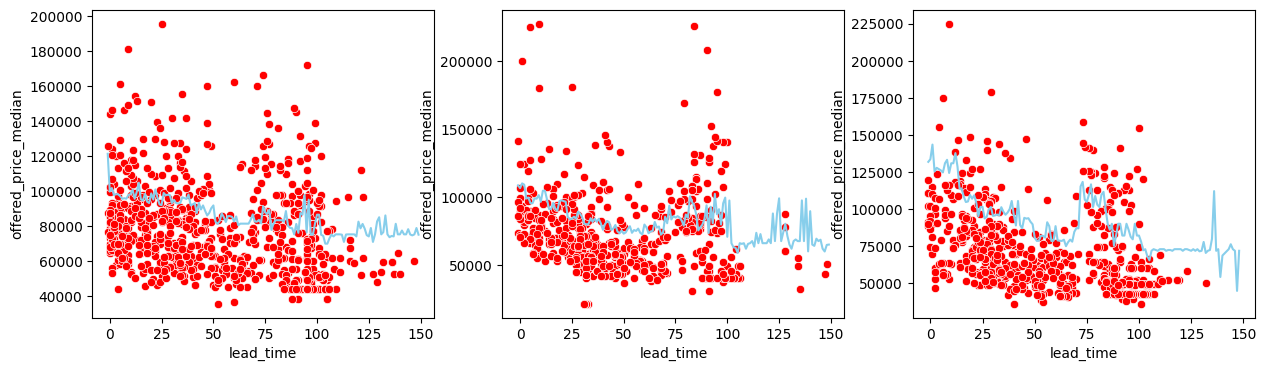

In [955]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,4))

sns.lineplot(ax=ax1, data=hotel1[hotel1['lead_time']<150][['lead_time','offered_price_median']].groupby(by='lead_time').median().reset_index(), x='lead_time', y='offered_price_median', ci=None, color='skyblue')
sns.scatterplot(ax=ax1, data=hotel1[hotel1['lead_time']<150][['lead_time','picked_price_p_night']], x='lead_time', y='picked_price_p_night', color='red')

sns.lineplot(ax=ax2, data=hotel2[hotel2['lead_time']<150][['lead_time','offered_price_median']].groupby(by='lead_time').median().reset_index(), x='lead_time', y='offered_price_median', ci=None, color='skyblue')
sns.scatterplot(ax=ax2, data=hotel2[hotel2['lead_time']<150][['lead_time','picked_price_p_night']], x='lead_time', y='picked_price_p_night', color='red')

sns.lineplot(ax=ax3, data=hotel3[hotel3['lead_time']<150][['lead_time','offered_price_median']].groupby(by='lead_time').median().reset_index(), x='lead_time', y='offered_price_median', ci=None, color='skyblue')
sns.scatterplot(ax=ax3, data=hotel3[hotel3['lead_time']<150][['lead_time','picked_price_p_night']], x='lead_time', y='picked_price_p_night', color='red')

In [956]:
# offered room közül melyiket választják?
    # new flag column: which booking prices are above the median offered price
        # why are these different?
        # who choses the more expensive offers?
    
    # - a felajánlott szobák közül melyiket választják
        #    - ezt mi befolyásolja
        #    - Melyik célcsoport melyik áru szobát választja?
    
    # egyes celcsoportok mennyit hajlandoak egy szobaert fizetni, hogyan valasztjak ki a szobat, melyik ar nyero?

In [957]:
# Join median prices to the original dataframe
merged = hotel1[['arrival','picked_price_p_night']].join(hotel1[['arrival','offered_price_median']].groupby(by='arrival').median(), on='arrival', validate='m:1')
# Add the new column with adjusted logic
hotel1['higher_than_medium_price'] = np.where(
    merged['picked_price_p_night'].isna(),  # Condition if picked_price_p_night is NaN
    float("NAN"),  # Set False when picked_price_p_night is NaN
    merged['picked_price_p_night'] > merged['offered_price_median']  # Original condition
)

# Join median prices to the original dataframe
merged = hotel2[['arrival','picked_price_p_night']].join(hotel2[['arrival','offered_price_median']].groupby(by='arrival').median(), on='arrival', validate='m:1')
# Add the new column with adjusted logic
hotel2['higher_than_medium_price'] = np.where(
    merged['picked_price_p_night'].isna(),  # Condition if picked_price_p_night is NaN
    float("NAN"),  # Set False when picked_price_p_night is NaN
    merged['picked_price_p_night'] > merged['offered_price_median']  # Original condition
)

# Join median prices to the original dataframe
merged = hotel3[['arrival','picked_price_p_night']].join(hotel3[['arrival','offered_price_median']].groupby(by='arrival').median(), on='arrival', validate='m:1')
# Add the new column with adjusted logic
hotel3['higher_than_medium_price'] = np.where(
    merged['picked_price_p_night'].isna(),  # Condition if picked_price_p_night is NaN
    float("NAN"),  # Set False when picked_price_p_night is NaN
    merged['picked_price_p_night'] > merged['offered_price_median']  # Original condition
)

<Axes: xlabel='arrival', ylabel='offered_price_median'>

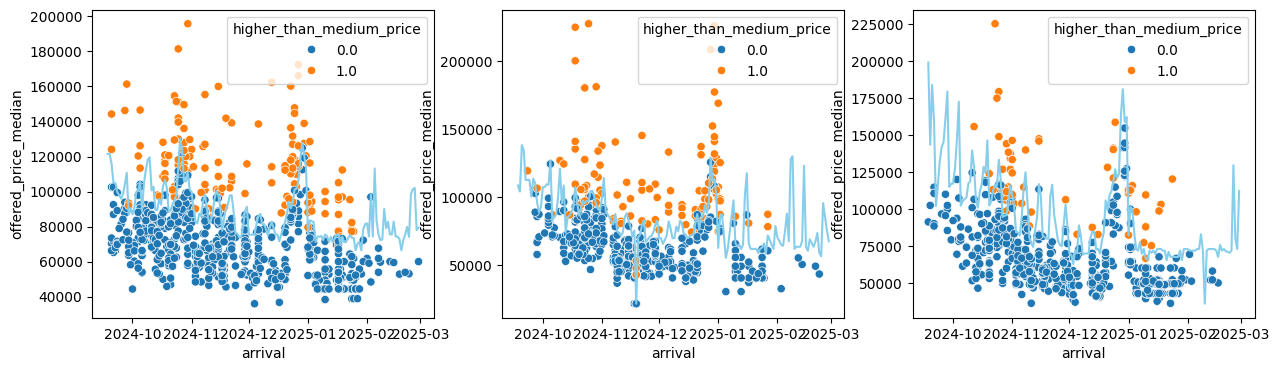

In [958]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,4))

sns.lineplot(ax=ax1, data=hotel1[hotel1['arrival']<'2025-03-01'][['arrival','offered_price_median']].groupby(by='arrival').median().reset_index(), x='arrival', y='offered_price_median', ci=None, color='skyblue')
sns.scatterplot(ax=ax1, data=hotel1[hotel1['arrival']<'2025-03-01'], x='arrival', y='picked_price_p_night', hue='higher_than_medium_price', color='red')

sns.lineplot(ax=ax2, data=hotel2[hotel2['arrival']<'2025-03-01'][['arrival','offered_price_median']].groupby(by='arrival').median().reset_index(), x='arrival', y='offered_price_median', ci=None, color='skyblue')
sns.scatterplot(ax=ax2, data=hotel2[hotel2['arrival']<'2025-03-01'], x='arrival', y='picked_price_p_night', hue='higher_than_medium_price', color='red')

sns.lineplot(ax=ax3, data=hotel3[hotel3['arrival']<'2025-03-01'][['arrival','offered_price_median']].groupby(by='arrival').median().reset_index(), x='arrival', y='offered_price_median', ci=None, color='skyblue')
sns.scatterplot(ax=ax3, data=hotel3[hotel3['arrival']<'2025-03-01'], x='arrival', y='picked_price_p_night', hue='higher_than_medium_price', color='red')

<Axes: xlabel='arrival', ylabel='offered_price_median'>

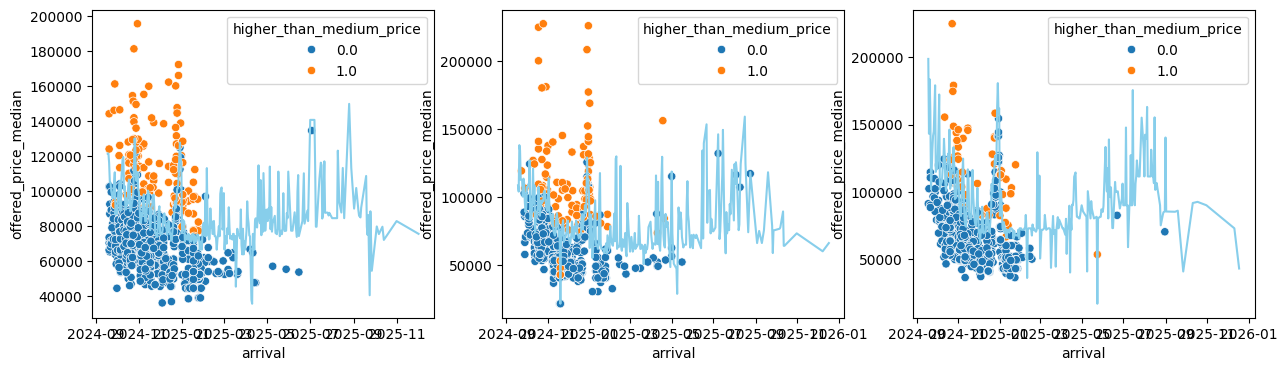

In [959]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,4))

sns.lineplot(ax=ax1, data=hotel1[['arrival','offered_price_median']].groupby(by='arrival').median().reset_index(), x='arrival', y='offered_price_median', ci=None, color='skyblue')
sns.scatterplot(ax=ax1, data=hotel1, x='arrival', y='picked_price_p_night', hue='higher_than_medium_price', color='red')

sns.lineplot(ax=ax2, data=hotel2[['arrival','offered_price_median']].groupby(by='arrival').median().reset_index(), x='arrival', y='offered_price_median', ci=None, color='skyblue')
sns.scatterplot(ax=ax2, data=hotel2, x='arrival', y='picked_price_p_night', hue='higher_than_medium_price', color='red')

sns.lineplot(ax=ax3, data=hotel3[['arrival','offered_price_median']].groupby(by='arrival').median().reset_index(), x='arrival', y='offered_price_median', ci=None, color='skyblue')
sns.scatterplot(ax=ax3, data=hotel3, x='arrival', y='picked_price_p_night', hue='higher_than_medium_price', color='red')

In [960]:
hotel1[['nights', 'adults', 'children', 'if_children','children_age_mean','sel_num_of_rooms',
        'upsell_total_price','lead_time','higher_than_medium_price']].groupby(by='higher_than_medium_price').mean()

nights    adults  children  if_children  \
higher_than_medium_price                                              
0.0                       2.625000  2.360937  0.387500     0.234375   
1.0                       2.402597  2.500000  1.422078     0.798701   

                          children_age_mean  sel_num_of_rooms  \
higher_than_medium_price                                        
0.0                                7.015815          1.239062   
1.0                                9.402778          1.058442   

                          upsell_total_price  lead_time  
higher_than_medium_price                                 
0.0                               961.321799  53.753125  
1.0                              1036.688312  54.629870

<Axes: xlabel='upsell_total_price', ylabel='Count'>

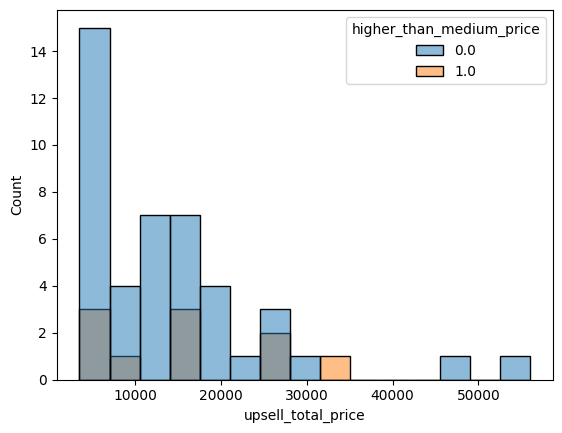

In [961]:
sns.histplot(data=hotel1[hotel1['upsell_total_price']>0], x='upsell_total_price',hue='higher_than_medium_price', bins=15)

In [962]:
hotel1[['utm_medium', 'higher_than_medium_price']].groupby(by='utm_medium').mean()


################ other csoportot kifejteni, az miért magas szám????

higher_than_medium_price
utm_medium                          
(not set)                   0.203125
cpc                         0.201389
ct                          1.000000
direct                      0.163636
email                       0.142857
offline                     0.500000
organic                     0.165517
other                            NaN
referral                    0.192308

In [963]:
hotel1[['utm_source', 'higher_than_medium_price']].groupby(by='utm_source').mean()

higher_than_medium_price
utm_source                          
bing                        0.346154
facebook                    0.142857
google                      0.189944
instagram                        NaN
na                          0.203125
other                       0.183007

In [964]:
hotel2[['nights', 'adults', 'children', 'if_children','children_age_mean','sel_num_of_rooms',
        'upsell_total_price','lead_time','higher_than_medium_price']].groupby(by='higher_than_medium_price').mean()

nights    adults  children  if_children  \
higher_than_medium_price                                              
0.0                       2.493182  2.097727  0.311364     0.227273   
1.0                       2.360000  2.360000  0.888000     0.528000   

                          children_age_mean  sel_num_of_rooms  \
higher_than_medium_price                                        
0.0                                6.201754          1.140909   
1.0                                8.977273          1.056000   

                          upsell_total_price  lead_time  
higher_than_medium_price                                 
0.0                               802.484361  52.404545  
1.0                               704.329552  56.368000

<Axes: xlabel='upsell_total_price', ylabel='Count'>

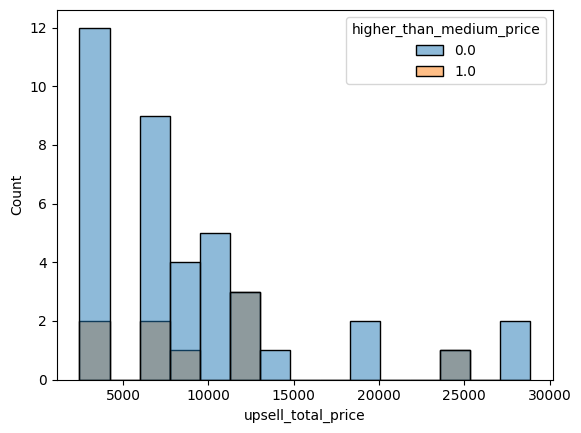

In [965]:
sns.histplot(data=hotel2[hotel2['upsell_total_price']>0], x='upsell_total_price',hue='higher_than_medium_price', bins=15)

In [966]:
print(hotel2[['utm_medium', 'higher_than_medium_price']].groupby(by='utm_medium').mean())
print(hotel2[['utm_source', 'higher_than_medium_price']].groupby(by='utm_source').mean())

            higher_than_medium_price
utm_medium                          
(not set)                   0.358974
cpc                         0.206897
ct                          0.000000
direct                      0.253012
email                       0.000000
offline                     0.500000
organic                     0.196078
other                            NaN
referral                    0.300000
            higher_than_medium_price
utm_source                          
bing                        0.181818
facebook                    0.400000
google                      0.203046
instagram                   1.000000
na                          0.358974
other                       0.230769


In [967]:
hotel3[['nights', 'adults', 'children', 'if_children','children_age_mean','sel_num_of_rooms',
        'upsell_total_price','lead_time','higher_than_medium_price']].groupby(by='higher_than_medium_price').mean()

nights    adults  children  if_children  \
higher_than_medium_price                                              
0.0                       2.507513  2.220367  0.163606     0.111853   
1.0                       2.468750  2.156250  1.203125     0.687500   

                          children_age_mean  sel_num_of_rooms  \
higher_than_medium_price                                        
0.0                                5.597701          1.160267   
1.0                                9.261364          1.062500   

                          upsell_total_price  lead_time  
higher_than_medium_price                                 
0.0                              2310.477933  56.634391  
1.0                              1140.468750  53.859375

<Axes: xlabel='upsell_total_price', ylabel='Count'>

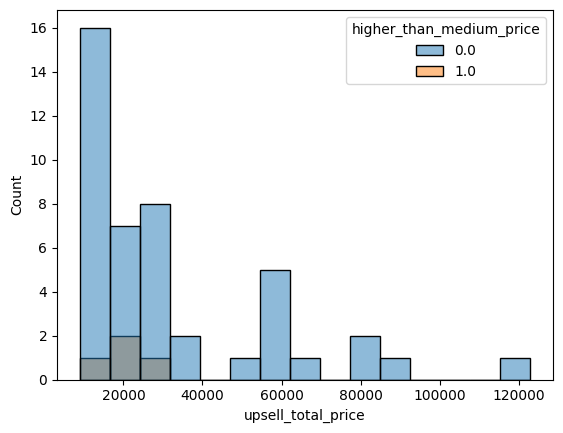

In [968]:
sns.histplot(data=hotel3[hotel3['upsell_total_price']>0], x='upsell_total_price',hue='higher_than_medium_price', bins=15)

In [969]:
print(hotel3[['utm_medium', 'higher_than_medium_price']].groupby(by='utm_medium').mean())
print(hotel3[['utm_source', 'higher_than_medium_price']].groupby(by='utm_source').mean())

            higher_than_medium_price
utm_medium                          
(not set)                   0.060000
cpc                         0.115789
ct                          0.000000
direct                      0.056075
email                       0.000000
offline                     0.000000
organic                     0.101852
other                            NaN
referral                    0.000000
            higher_than_medium_price
utm_source                          
bing                        0.083333
facebook                    0.142857
google                      0.113978
instagram                        NaN
na                          0.060000
other                       0.046512


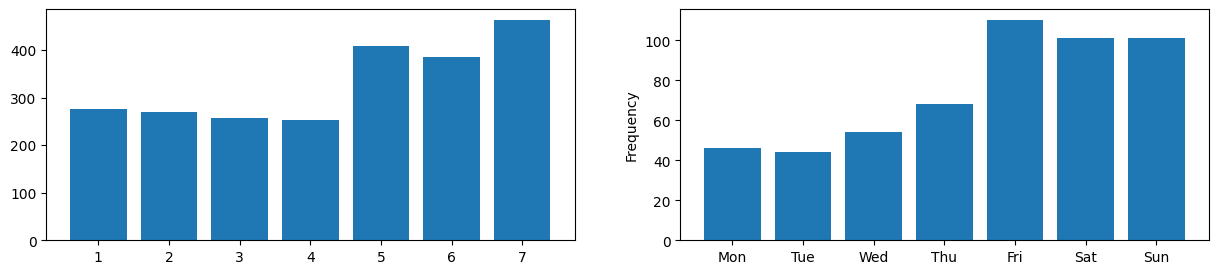

In [970]:
# which days are less popular for each monetary group?
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,3))

ltm_h1 = Counter(day for days in hotel1[hotel1['higher_than_medium_price']==0]['days_of_week_in_stay'] for day in days)
htm_h1 = Counter(day for days in hotel1[hotel1['higher_than_medium_price']==1]['days_of_week_in_stay'] for day in days)
ax1.bar(ltm_h1.keys(), ltm_h1.values())
ax2.bar(htm_h1.keys(), htm_h1.values())
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel("Frequency")
plt.show()

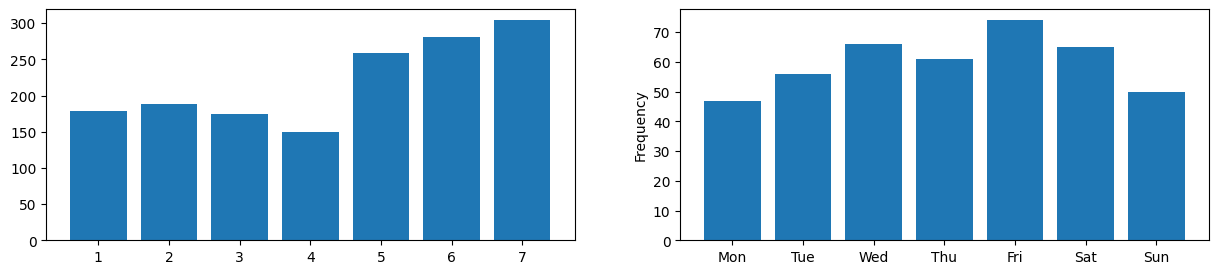

In [971]:
# which days are less popular for each monetary group?
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,3))

ltm_h2 = Counter(day for days in hotel2[hotel2['higher_than_medium_price']==0]['days_of_week_in_stay'] for day in days)
htm_h2 = Counter(day for days in hotel2[hotel2['higher_than_medium_price']==1]['days_of_week_in_stay'] for day in days)
ax1.bar(ltm_h2.keys(), ltm_h2.values())
ax2.bar(htm_h2.keys(), htm_h2.values())
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel("Frequency")
plt.show()

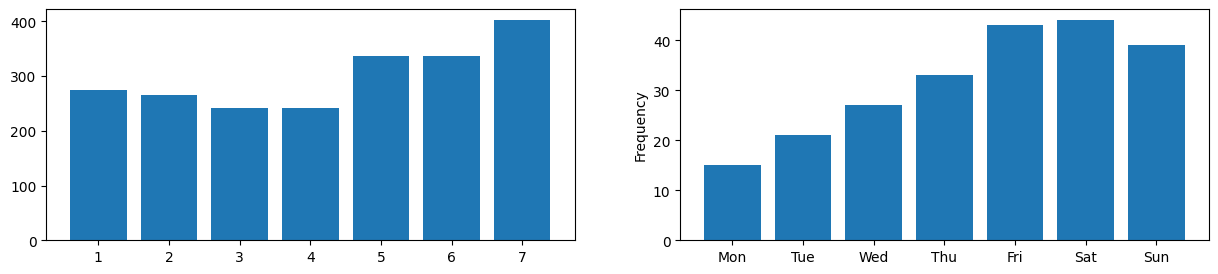

In [972]:
# which days are less popular for each monetary group?
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,3))

ltm_h3 = Counter(day for days in hotel3[hotel3['higher_than_medium_price']==0]['days_of_week_in_stay'] for day in days)
htm_h3 = Counter(day for days in hotel3[hotel3['higher_than_medium_price']==1]['days_of_week_in_stay'] for day in days)
ax1.bar(ltm_h3.keys(), ltm_h3.values())
ax2.bar(htm_h3.keys(), htm_h3.values())
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel("Frequency")
plt.show()

In [973]:
df.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'picked_price_median', 'picked_price_p_night', 'picked_room',
       'baby_bed', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_discount_total', 'redeemed_loyalty_points_total', 'hotel_id',
       'rfm_monetary_score', 'rfm_duration_score', '0_age', '1_age', '2_age',
       '3_age', '4_age', 'ROOMAA_room_price_min', 'offered_price_median',
       'offered_price_min', 'offered_price_max', 'ROOMAA_room_price_max',
       'ROOMBB_room_price_min', 'ROOMBB_room_price_max',
       'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
       'ROOMDD_room_price_min', 'ROOMDD_room

In [974]:

#+    ################ other csoportot kifejteni, az miért magas szám???? - hotel_1 utm_medium


# melyek a nem eredményes kampányok, és miért?
    # campaign table elemzés
# akik keresnek, mit keresnek?
    # general search patterns for each hotel, the most common combinations (like weekend for 2 adults, with children)
# mi az oka, hogy egy időszakot nagyon keresnek, de aztán nem foglalnak?
    # funnel, where the users get stucked
    # then analysis the problematic step

# funnel for each segment

# princiapl component analysis, kmeans clustering